# Building Predictive Model of Application Rating in Google Play App Store 
## Part 1. Exploratory Data Analysis 

> Author: **Chloe Jung** <br>
> Date Finished: January 16th, 20201

## Table of Contents

The data was obtained from [Kaggle](https://www.kaggle.com/lava18/google-play-store-apps).

* [1. Import the Packages](#ImportPackages)
* [2. Objectives](#Objectives)
* [3. Load the Data](#LoadData)
* [4. Explore the Data](#ExploreData)
    * [4-1. Target Variable: Rating](#4-1)
    * [4-2. App](#4-2)
    * [4-3. Category](#4-3)
    * [4-4. Genres](#4-4)
    * [4-5. Content Rating](#4-5)
    * [4-6. Reviews](#4-6)
    * [4-7. Size](#4-7)
    * [4-8. Installs](#4-8)
    * [4-9. Type](#4-9)
    * [4-10. Price](#4-10)
    * [4-11. Last Updated](#4-11)
    * [4-12. Current Ver](#4-12)
    * [4-13. Android Ver](#4-13)
* [5. Correlation](#Correlation)
* [6. Export the Data](#ExportData)

## 1. Import Packages <a class="anchor" id="ImportPackages"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pylab import rcParams
import plotly
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
from wordcloud import WordCloud
import matplotlib.dates as mdates
from matplotlib import gridspec

## 2. Objectives <a class="anchor" id="Objectives"></a>
- Explore the general trends of applications in Google Play App Store through different visualizations
- Build a reliable machine learning model that can successfully predict the ratings of the applications (in Part 2)

## 3. Load Google Play Store Apps Data <a class="anchor" id="LoadData"></a>

In [2]:
data = pd.read_csv('googleplaystore.csv')
data.shape

(10841, 13)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Except for the "Rating" (float64) all the columns are object.

In [4]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


## 4. Explore the Data <a class="anchor" id="ExploreData"></a>

### Number of Missing Values by Column

In [5]:
missing = pd.concat([data.isnull().sum(), 100 * data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False)

,count,%
Rating,1474,13.596532
Current Ver,8,0.073794
Android Ver,3,0.027673
Type,1,0.009224
Content Rating,1,0.009224
App,0,0.000000
Category,0,0.000000
Reviews,0,0.000000
Size,0,0.000000
Installs,0,0.000000


Rating, Current Ver, Android Ver, Type and Content Rating have some missing values. Rating has the most missing value, at around 13.6%.

### 4-1. Target Variable: Rating<a class="anchor" id="4-1"></a>

In [6]:
data['Rating'].describe()

count    9367.000000
mean        4.193338
std         0.537431
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max        19.000000
Name: Rating, dtype: float64

The maximum value of rating is 19, which suggests that there might be an error in data entry. The rating should be within the range of 0 to 5. 

In [7]:
# Unique "Rating"
data['Rating'].value_counts()

4.4     1109
4.3     1076
4.5     1038
4.2      952
4.6      823
4.1      708
4.0      568
4.7      499
3.9      386
3.8      303
5.0      274
3.7      239
4.8      234
3.6      174
3.5      163
3.4      128
3.3      102
4.9       87
3.0       83
3.1       69
3.2       64
2.9       45
2.8       42
2.6       25
2.7       25
2.5       21
2.3       20
2.4       19
1.0       16
2.2       14
1.9       13
2.0       12
2.1        8
1.7        8
1.8        8
1.6        4
1.4        3
1.5        3
1.2        1
19.0       1
Name: Rating, dtype: int64

As suspected, there is one entry of an application that is rated 19. Let's examine this row to get further insight into what is wrong.

In [8]:
data[data['Rating'] == 19]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,11-Feb-18,1.0.19,4.0 and up,NaN


In [9]:
# Delete the row with "Rating"=19.0
data = data.drop(data[data['Rating'] == 19.0].index)

In [10]:
data['Rating'].describe()

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

- The maximum value of the rating is 5 and the minimum value of the rating is 1. 
- The mean value of the rating is 4.19.

#### Distribution of Rating - Kernel Density Plot

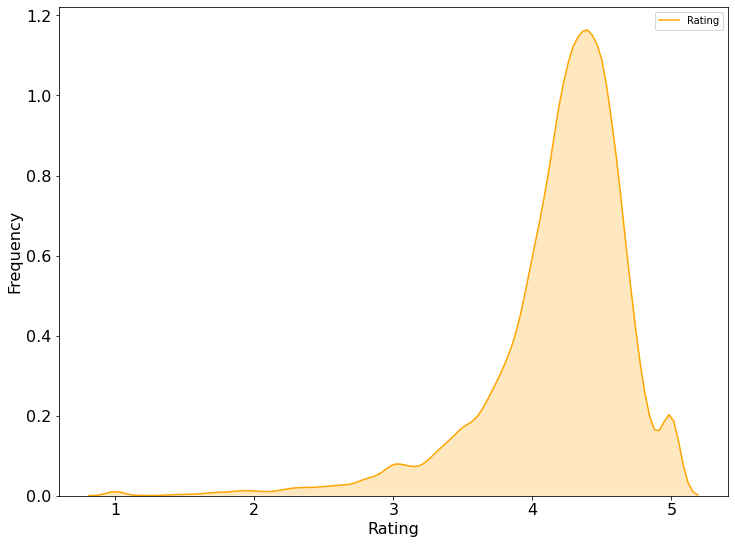

In [11]:
rcParams['figure.figsize'] = 12,9;
gr = sns.kdeplot(data.Rating, color="orange", shade = True);
gr.set_xlabel("Rating", size=16);
gr.set_ylabel("Frequency",size=16);
#plt.title('Kernel Density Plot of Rating', size=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
gr.figure.savefig('Rating_kdensity.png',bbox_inches = 'tight')

In [12]:
col='Rating'
v=data[col].value_counts().reset_index()
v=v.rename(columns={col:'count','index':col})
v['percent']=v['count'].apply(lambda x : 100*x/sum(v['count']))
v=v.sort_values(col)
trace = go.Bar(x=v[col], y=v["count"], name="Paid",  marker=dict(color="orange"))
y=[trace]
layout={'title':"Histogram of Rating with Bin Width of 0.1",'xaxis':{'title':"Ratings"}}
fig = go.Figure(data=y, layout=layout)
iplot(fig)

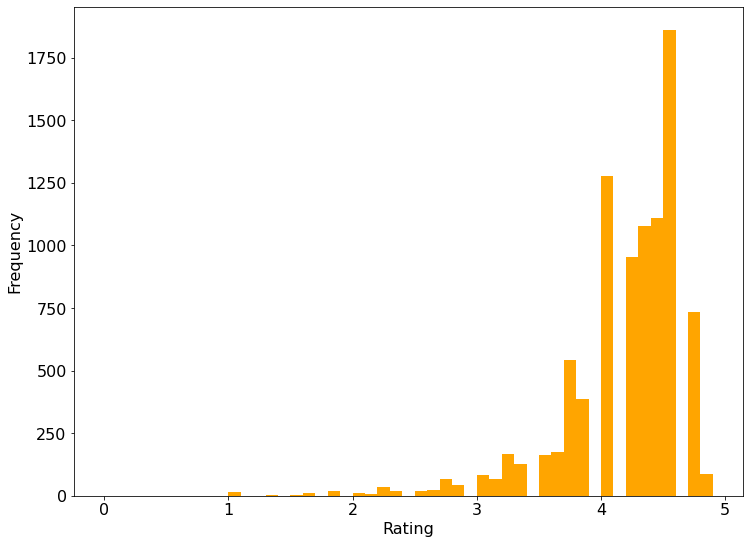

In [13]:
bins_list = np.arange(0,5,0.1)
rhist= plt.hist(data.Rating,bins=bins_list, color="orange")
#plt.title('Histogram of Rating',size=20)
plt.xlabel('Rating',size=16)
plt.ylabel('Frequency',size=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('rating_hist.png',bbox_inches = 'tight')
plt.show()

The histograms above show that most of the rating are above 4, and mostly around 4 to 4.5.

In [14]:
# Categorizing the Rating
rbelow = data[data['Rating']<4.19]
rabove = data[data['Rating']>=4.19]

### 4-2. App <a class="anchor" id="4-2"></a>

In [15]:
data['App'].describe()

count      10840
unique      9659
top       ROBLOX
freq           9
Name: App, dtype: object

In [16]:
# Unique "App" names
data['App'].value_counts().head(10)

ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
ESPN                                                 7
Duolingo: Learn Languages Free                       7
8 Ball Pool                                          7
Candy Crush Saga                                     7
Zombie Catchers                                      6
Subway Surfers                                       6
Sniper 3D Gun Shooter: Free Shooting Games - FPS     6
Nick                                                 6
Name: App, dtype: int64

There are multiple entries of the apps whose names are the same.

In [17]:
# Set the names of the apps as indces
data.set_index("App", inplace=True)

### 4-3. Category <a class="anchor" id="4-3"></a>

In [18]:
data['Category'].describe()

count      10840
unique        33
top       FAMILY
freq        1972
Name: Category, dtype: object

In [19]:
# Unique "Cateogry"
data['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

In [20]:
print("There are", len(data['Category'].unique()) , "categories.")

There are 33 categories.


#### Distribution of Categories - Bar Plot

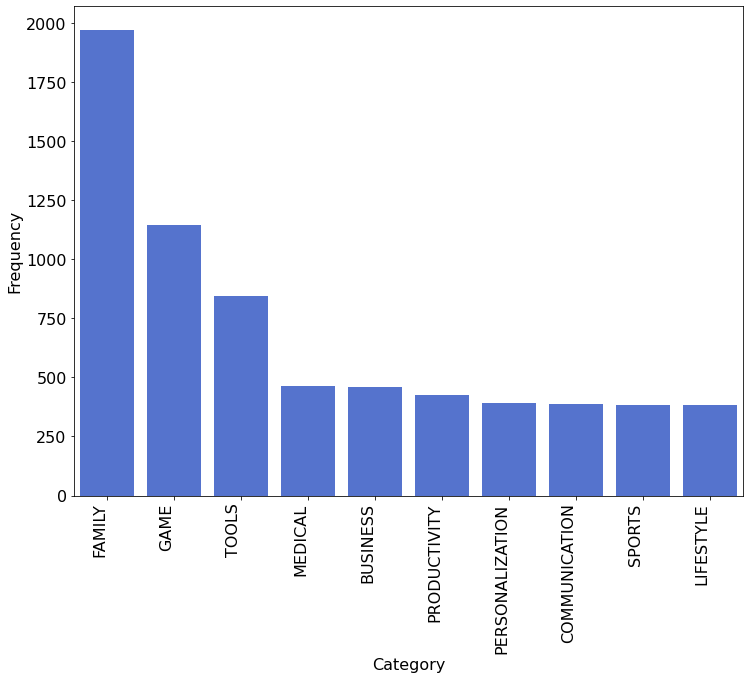

In [21]:
gc = sns.countplot(x="Category",data=data, color='#4169E1', order = data['Category'].value_counts().index[:10]);
gc.set_xticklabels(gc.get_xticklabels(), rotation=90, ha="right");
#plt.title('Bar Plot of Applications in Each Category',size = 20);
plt.xlabel('Category',fontsize=16)
plt.ylabel('Frequency',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
gc.figure.savefig('Categories_bar.png',bbox_inches = 'tight')

#### Word Cloud of Categories

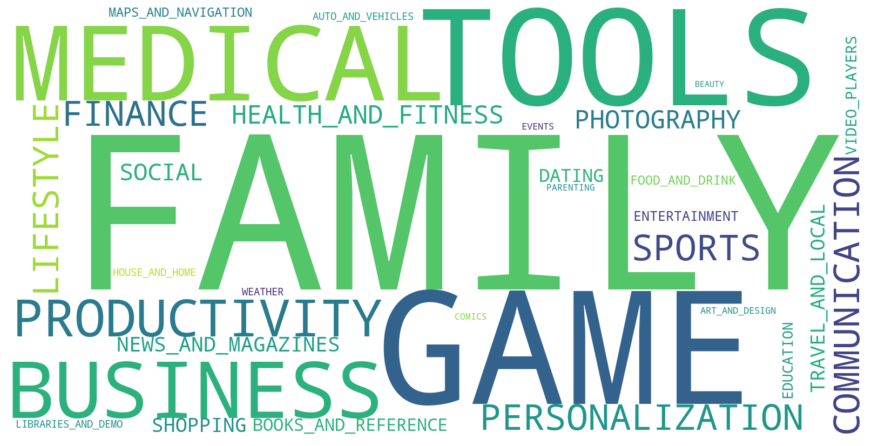

In [22]:
wordcloud = WordCloud(max_font_size=400, collocations=False, max_words=33, width=1600, height=800, background_color="white").generate(' '.join(data['Category']))
plt.figure(figsize=(12,9))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig('Categories_wordcloud.png',bbox_inches = 'tight')
plt.show()

Category "Family" has the highest counts of apps, followed by "Games" and "Personalization."

Top 5 cateogires: <Br>
    1) Family <Br>
    2) Game <Br>
    3) Tools <Br>
    4) Medical <Br>
    5) Business

In [23]:
topfive = ['FAMILY', 'GAME', 'TOOLS','MEDICAL','BUSINESS']
topcat = data.loc[data['Category'].isin(topfive)]
topcat.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,
Visual Voicemail by MetroPCS,BUSINESS,4.1,16129,Varies with device,"10,000,000+",Free,0,Everyone,Business,30-Jul-18,Varies with device,Varies with device
Indeed Job Search,BUSINESS,4.3,674730,Varies with device,"50,000,000+",Free,0,Everyone,Business,21-May-18,Varies with device,Varies with device
Uber Driver,BUSINESS,4.4,1254730,Varies with device,"10,000,000+",Free,0,Everyone,Business,3-Aug-18,Varies with device,Varies with device
ADP Mobile Solutions,BUSINESS,4.3,85185,29M,"5,000,000+",Free,0,Everyone,Business,17-Jul-18,3.4.2,5.0 and up
Snag - Jobs Hiring Now,BUSINESS,4.3,32584,Varies with device,"1,000,000+",Free,0,Everyone,Business,4-May-18,Varies with device,Varies with device


#### Overlayed Histogram of Rating for Top 5 Categories

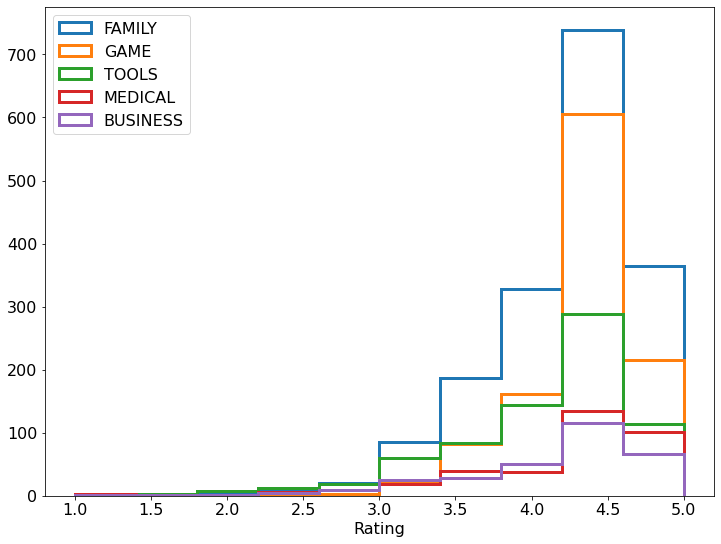

In [24]:
np.warnings.filterwarnings('ignore')
for cat in topfive: 
    one=topcat[topcat['Category']==cat]
    plt.hist(one.Rating,histtype='step',label=cat,linewidth=3)
    plt.legend(loc='upper left',fontsize=16)
    plt.xlabel('Rating',fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
plt.savefig('cat_top5_overlay.png',bbox_inches = 'tight')

#### Overlayed Histogram and Normalized Curve of Rating for Top 5 Categories

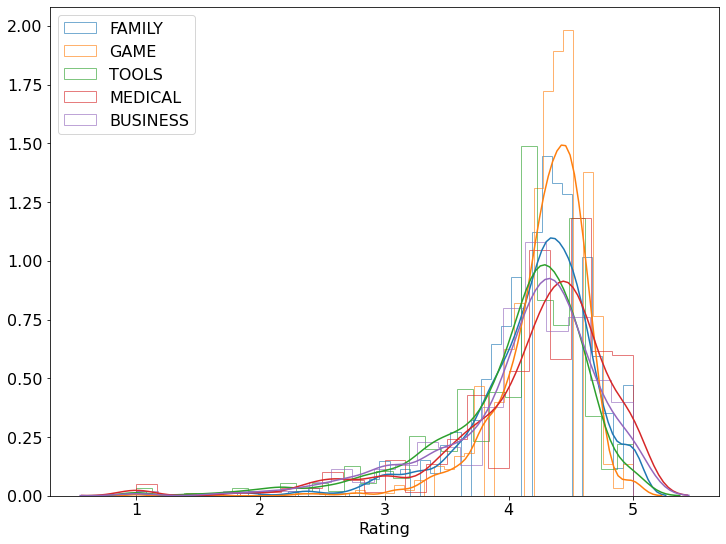

In [25]:
for cat in topfive: 
    one=topcat[topcat['Category']==cat]
    sns.distplot(one.Rating,norm_hist=True,label=cat,hist_kws={"histtype": "step","alpha":0.6})
    plt.legend(loc='upper left',fontsize=16)
    plt.xlabel('Rating',fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
plt.savefig('cat_top5_overlaynorm.png',bbox_inches = 'tight')

#### Histogram and Normalized Curve of Rating for Top 4 Categories

In [26]:
fam = topfive[0], round(np.mean(topcat[topcat['Category']=='FAMILY'].Rating),2),round(np.std(topcat[topcat['Category']=='FAMILY'].Rating),2)
gam = topfive[1], round(np.mean(topcat[topcat['Category']=='GAME'].Rating),2), round(np.std(topcat[topcat['Category']=='GAME'].Rating),2)
too = topfive[2], round(np.mean(topcat[topcat['Category']=='TOOLS'].Rating),2), round(np.std(topcat[topcat['Category']=='TOOLS'].Rating),2)
med = topfive[3], round(np.mean(topcat[topcat['Category']=='MEDICAL'].Rating),2), round(np.std(topcat[topcat['Category']=='MEDICAL'].Rating),2)

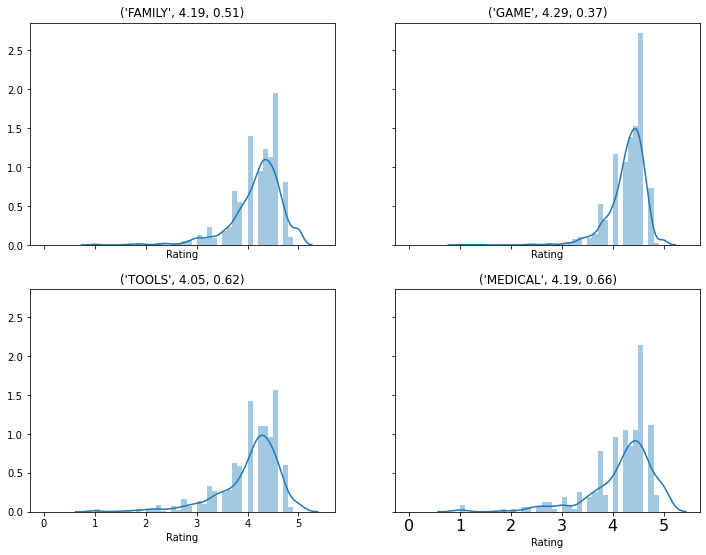

In [27]:
bins_list=np.arange(0,5,0.1)
fig,axs =  plt.subplots(2,2,sharex=True,sharey=True)
sns.distplot(topcat[topcat['Category']=='FAMILY'].Rating, ax=axs[0,0], label='Family',norm_hist=True,bins=bins_list)
axs[0,0].set_title(fam)
sns.distplot(topcat[topcat['Category']=='GAME'].Rating,ax=axs[0,1], label='Game',norm_hist=True,bins=bins_list)
axs[0,1].set_title(gam)
sns.distplot(topcat[topcat['Category']=='TOOLS'].Rating,ax=axs[1,0], label='Tools',norm_hist=True,bins=bins_list)
axs[1,0].set_title(too)
sns.distplot(topcat[topcat['Category']=='MEDICAL'].Rating,ax=axs[1,1], label='Medical',norm_hist=True,bins=bins_list)
axs[1,1].set_title(med)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('cat_top5_overlaysubplotnorm.png',bbox_inches = 'tight')

#### Categories and Rating - Boxplot

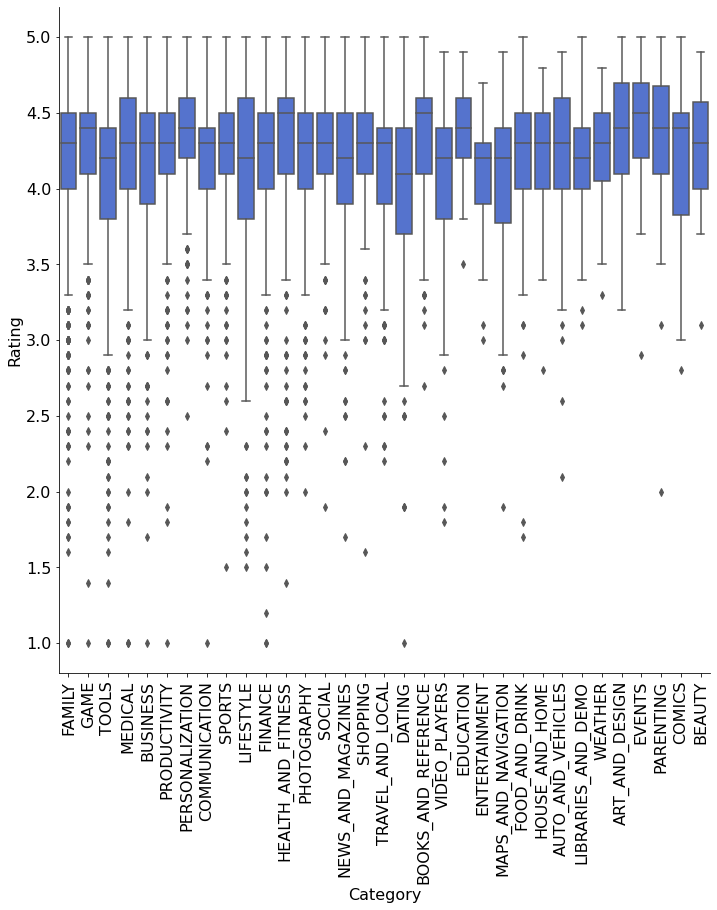

In [28]:
gcr = sns.catplot(x="Category",y="Rating",data=data, kind="box", height = 10, color="#4169E1",order = data['Category'].value_counts().index)
gcr.set_xticklabels(rotation=90)
gcr = gcr.set_ylabels("Rating")
#plt.title('Box Plot of Ratings for Apps of Different Category',size = 20);
plt.xlabel('Category',fontsize=16)
plt.ylabel('Rating',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('Category_Rating_Boxplot.png',bbox_inches = 'tight')

Apps whose category is "Events" tend to have higher mean ratings, while "Dating" apps tend to have lower ratings. This is confirmed by checking the lowest and highest mean rating of the category as follow:

In [29]:
data[['Category', 'Rating']].groupby(['Category'], as_index=False).mean().sort_values('Rating').head(1)

,Category,Rating
7,DATING,3.970769


In [30]:
data[['Category', 'Rating']].groupby(['Category'], as_index=False).mean().sort_values('Rating').tail(1)

,Category,Rating
10,EVENTS,4.435556


#### Categories and Rating - Rating Below Mean vs. Rating Above Mean

In [31]:
len(rbelow), len(rabove)

(3274, 6092)

In [32]:
col='Category'

v1=rbelow[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)

v2=rabove[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)

trace1 = go.Bar(x=v1[col], y=v1["count"], name="Below Average Rating", marker=dict(color="#4169E1"))
trace2 = go.Bar(x=v2[col], y=v2["count"], name="Above Average Rating", marker=dict(color="#FF8C00"))
y = [trace1, trace2]
layout={'title':"App Category"}
fig = go.Figure(data=y, layout=layout)
iplot(fig)

Both the apps that had above and below the average ratings showed similar trends regardless of categories.

### 4-4. Genres <a class="anchor" id="4-4"></a>

In [33]:
data['Genres'].describe()

count     10840
unique      119
top       Tools
freq        842
Name: Genres, dtype: object

In [34]:
# Unique "Genres"
data['Genres'].value_counts()

Tools                          842
Entertainment                  623
Education                      549
Medical                        463
Business                       460
                              ... 
Music & Audio;Music & Video      1
Card;Brain Games                 1
Comics;Creativity                1
Racing;Pretend Play              1
Strategy;Education               1
Name: Genres, Length: 119, dtype: int64

In [35]:
print( len(data['Genres'].unique()) , "unique genres")

119 unique genres


#### Distribution of Different Genres - Bar Plot

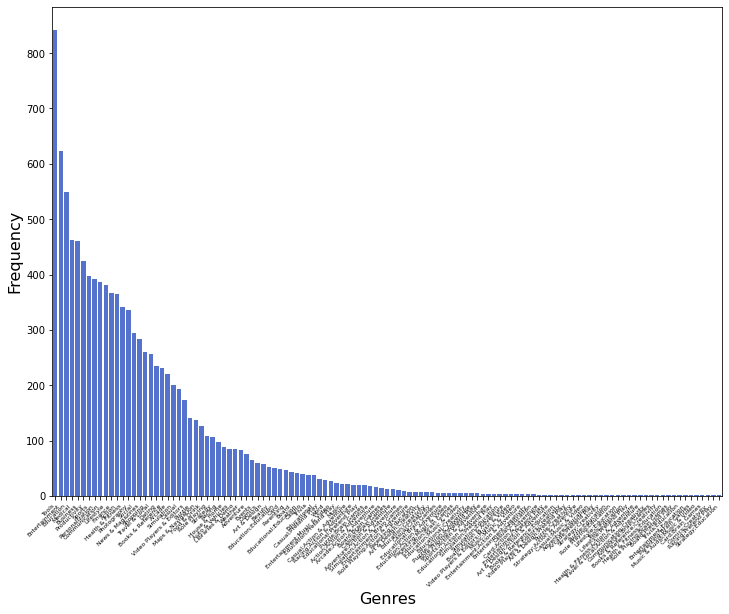

In [36]:
gg = sns.countplot(x="Genres",data=data, color = "#4169E1", order=data['Genres'].value_counts().index);
gg.set_xticklabels(gg.get_xticklabels(), rotation=45, ha="right");
plt.xlabel('Genres',size=16)
plt.ylabel('Frequency',size=16)
plt.xticks(fontsize=6)
gg
#plt.title('Count of apps in each genres',size = 13)
plt.savefig('Genre_BarBeforeCleaning.png',bbox_inches = 'tight')

We can see that there is a skewed distribution for "Genres," which can be a potential cause for a bias. Therefore, decided to get rid of the sub genres (that starts after ";") and just use the bigger genres.

In [37]:
data['Genres'] = data['Genres'].str.split(';').str[0]

In [38]:
print( len(data['Genres'].unique()) , "genres")
print("\n", data['Genres'].unique())

48 genres

 ['Art & Design' 'Auto & Vehicles' 'Beauty' 'Books & Reference' 'Business'
 'Comics' 'Communication' 'Dating' 'Education' 'Entertainment' 'Events'
 'Finance' 'Food & Drink' 'Health & Fitness' 'House & Home'
 'Libraries & Demo' 'Lifestyle' 'Adventure' 'Arcade' 'Casual' 'Card'
 'Action' 'Strategy' 'Puzzle' 'Sports' 'Music' 'Word' 'Racing'
 'Simulation' 'Board' 'Trivia' 'Role Playing' 'Educational'
 'Music & Audio' 'Video Players & Editors' 'Medical' 'Social' 'Shopping'
 'Photography' 'Travel & Local' 'Tools' 'Personalization' 'Productivity'
 'Parenting' 'Weather' 'News & Magazines' 'Maps & Navigation' 'Casino']


In [39]:
print( len(data['Genres'].unique()) , "unique genres")

48 unique genres


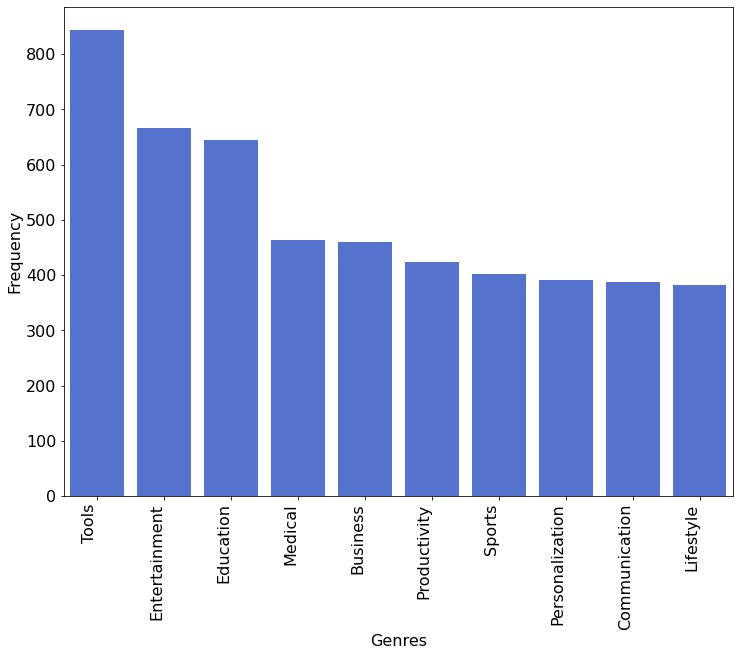

In [40]:
gg = sns.countplot(x="Genres",data=data, color = "#4169E1",order=data['Genres'].value_counts().index[:10]);
gg.set_xticklabels(gg.get_xticklabels(), rotation=90, ha="right");
gg
#plt.title('Histogram of apps in each genres',size = 20)
plt.xlabel('Genres',size=16)
plt.ylabel('Frequency',size=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('Genre_Bar.png',bbox_inches = 'tight')

#### Genres and Rating

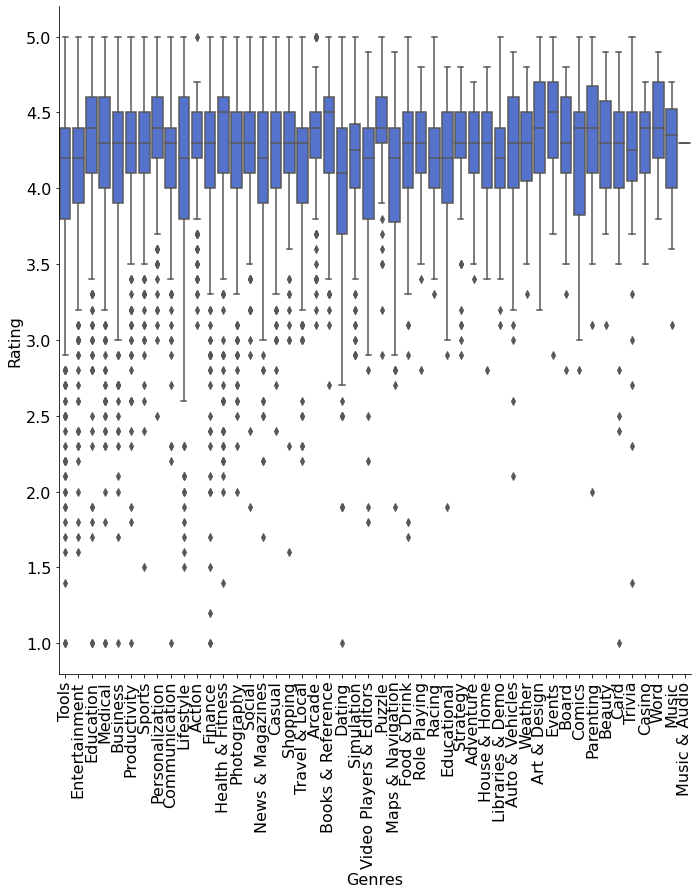

In [41]:
ggr = sns.catplot(x="Genres",y="Rating",data=data, kind="box", height = 10 , color = "#4169E1",order = data['Genres'].value_counts().index)
ggr.set_xticklabels(rotation=90)
ggr = ggr.set_ylabels("Rating")
#plt.title('Box Plot of Rating for Apps with Different Genres',size = 20);
plt.xlabel('Genres',size=16)
plt.ylabel('Rating',size=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('genres_rating_box.png',bbox_inches = 'tight')

As shown in EDA of Catgory, the apps whose genre is "Events" tend to have higher ratings, while the "Dating" apps tend to have lower ratings.

The graphs show that the Categories and Genres have many overlaps in many values.

#### Genres and Category

In [42]:
(data[data.Category != data.Genres]
 .groupby('Category')['Genres']
 .value_counts())

Category             Genres                 
ART_AND_DESIGN       Art & Design                65
AUTO_AND_VEHICLES    Auto & Vehicles             85
BEAUTY               Beauty                      53
BOOKS_AND_REFERENCE  Books & Reference          231
BUSINESS             Business                   460
                                               ... 
SPORTS               Sports                     384
TOOLS                Tools                      843
TRAVEL_AND_LOCAL     Travel & Local             258
VIDEO_PLAYERS        Video Players & Editors    175
WEATHER              Weather                     82
Name: Genres, Length: 71, dtype: int64

71 different combinations of Category and Genre.

In [43]:
data[['Category', 'Genres']].nunique()

Category    33
Genres      48
dtype: int64

### 4-5. Content Rating <a class="anchor" id="4-5"></a>

In [44]:
data['Content Rating'].describe()

count        10840
unique           6
top       Everyone
freq          8714
Name: Content Rating, dtype: object

In [45]:
# Unique "Content Rating"
data['Content Rating'].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

Most of the apps are made for "Everyone."

#### Barplot of Content Rating

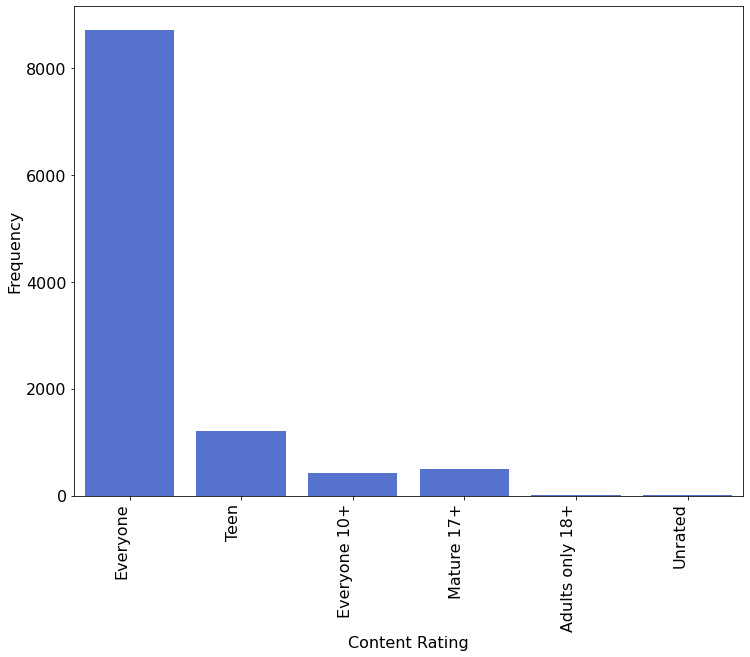

In [46]:
gcr = sns.countplot(x="Content Rating",data=data,color='#4169E1');
gcr.set_xticklabels(gcr.get_xticklabels(), rotation=90, ha="right");
#plt.title('Bar Plot of Content Rating for Apps',size = 20);
plt.xlabel('Content Rating',size=16)
plt.ylabel('Frequency',size=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('contentrating_bar.png',bbox_inches = 'tight')

There are only 2 entries of "Unrated," and 3 entries of "Adults only 18+."

In [47]:
data[data['Content Rating']=='Unrated']

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,
Best CG Photography,FAMILY,NaN,1,2.5M,500+,Free,0,Unrated,Entertainment,24-Jun-15,5.2,3.0 and up
DC Universe Online Map,TOOLS,4.1,1186,6.4M,"50,000+",Free,0,Unrated,Tools,27-Feb-12,1.3,2.3.3 and up


#### Content Rating and Rating - Box Plot

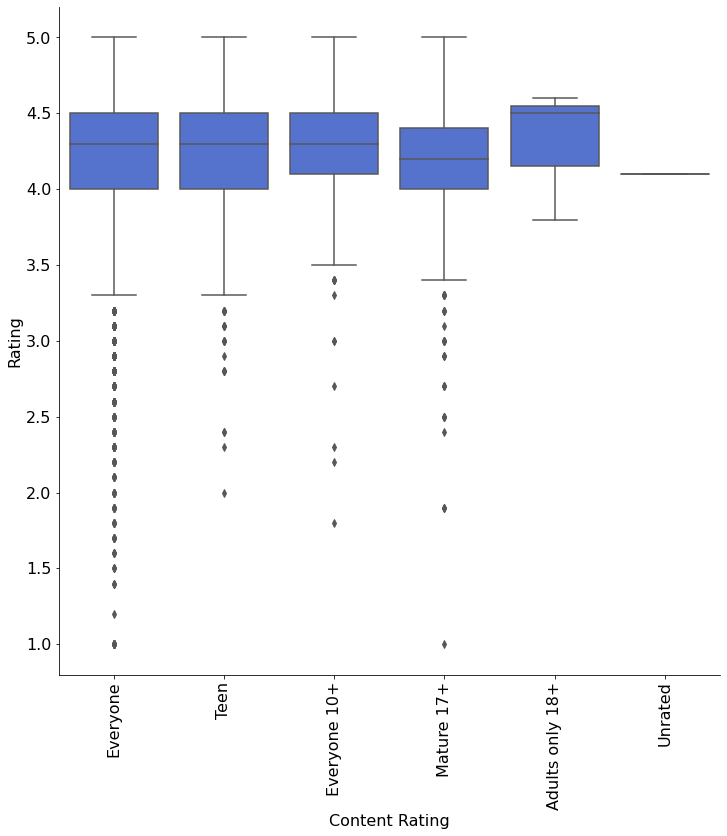

In [48]:
grcr = sns.catplot(x="Content Rating",y="Rating",data=data, kind="box", height = 10 ,color="#4169E1")
grcr.set_xticklabels(rotation=90)
grcr = grcr.set_ylabels("Rating")
#plt.title('Box plot of Rating for Each Content Rating',size = 20)
plt.xlabel('Content Rating',size=16)
plt.ylabel('Rating',size=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('content_rating_box.png',bbox_inches = 'tight')

Apps with the content rating of "Adults only 18+" seem to have higher rating, while the apps with the content rating of "Everyone" tend to have wide spread distribution of rating, ranging from 1 to 5.

### 4-6. Reviews <a class="anchor" id="4-6"></a>

In [49]:
data['Reviews'].describe()

count     10840
unique     6001
top           0
freq        596
Name: Reviews, dtype: object

In [50]:
pd.to_numeric(data['Reviews'],errors='coerce')

App
Photo Editor & Candy Camera & Grid & ScrapBook           159
Coloring book moana                                      967
U Launcher Lite – FREE Live Cool Themes, Hide Apps     87510
Sketch - Draw & Paint                                 215644
Pixel Draw - Number Art Coloring Book                    967
                                                       ...  
Sya9a Maroc - FR                                          38
Fr. Mike Schmitz Audio Teachings                           4
Parkinson Exercices FR                                     3
The SCP Foundation DB fr nn5n                            114
iHoroscope - 2018 Daily Horoscope & Astrology         398307
Name: Reviews, Length: 10840, dtype: int64

In [51]:
data['Reviews'].describe()

count     10840
unique     6001
top           0
freq        596
Name: Reviews, dtype: object

In [52]:
# Convert "Reviews" into integers
data['Reviews'] = data['Reviews'].apply(lambda x: int(x))
data['Reviews'].head()

App
Photo Editor & Candy Camera & Grid & ScrapBook           159
Coloring book moana                                      967
U Launcher Lite – FREE Live Cool Themes, Hide Apps     87510
Sketch - Draw & Paint                                 215644
Pixel Draw - Number Art Coloring Book                    967
Name: Reviews, dtype: int64

In [53]:
data['Reviews'].describe()

count    1.084000e+04
mean     4.441529e+05
std      2.927761e+06
min      0.000000e+00
25%      3.800000e+01
50%      2.094000e+03
75%      5.477550e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [54]:
# Unique "Reviews"
data['Reviews'].value_counts().head(10)

0    596
1    272
2    214
3    175
4    137
5    108
6     97
7     90
8     74
9     65
Name: Reviews, dtype: int64

#### Distribution of Number of Reviews   - Kernel Density Plot

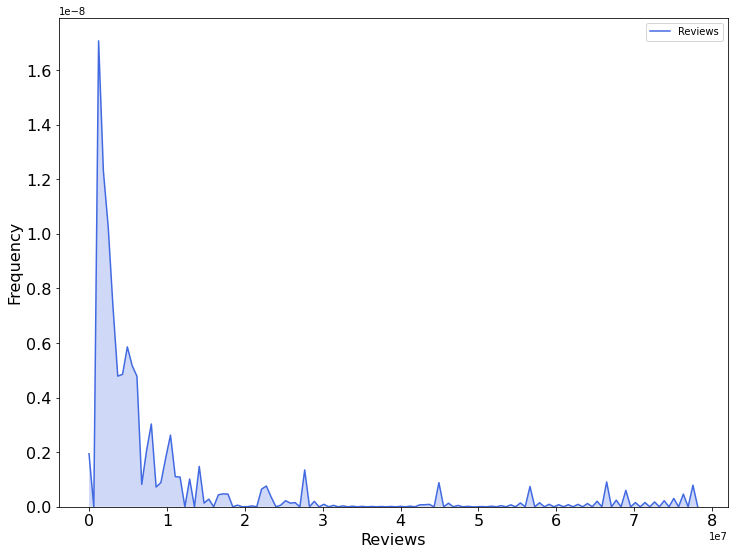

In [55]:
gnr = sns.kdeplot(data.Reviews, color="#4169E1", shade = True)
gnr.set_xlabel("Reviews")
gnr.set_ylabel("Frequency")
#plt.title('Kernel Density Plot of Number of Reveiws',size = 20);
plt.xlabel('Reviews',size=16)
plt.ylabel('Frequency',size=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('reviews_density.png',bbox_inches = 'tight')

#### Number of Reviews - Histogram

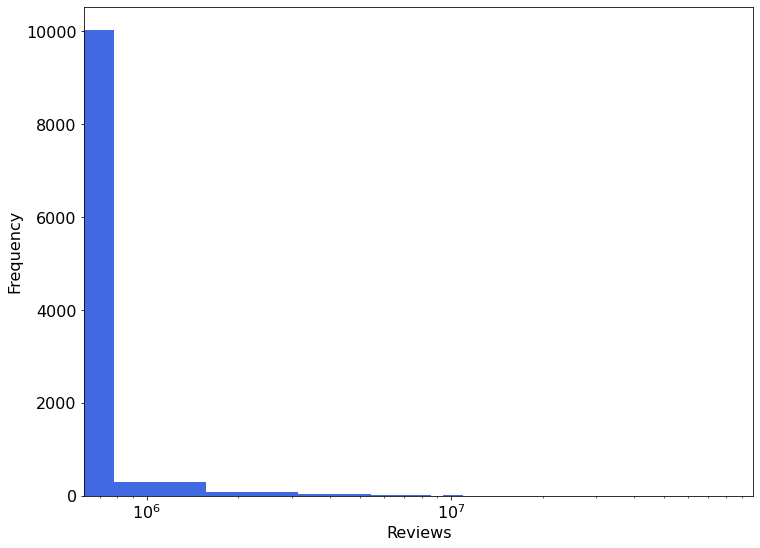

In [56]:
plt.hist(data.Reviews, bins=100, color='#4169E1')
plt.xlabel('Reviews',size=16)
plt.ylabel('Frequency',size=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xscale("log")
plt.savefig('reviews_bar.png',bbox_inches = 'tight')
plt.show()

In [57]:
# Median of Number of Reviews
print("min:", data['Reviews'].min(), "median:", data['Reviews'].median(), "mean:", data['Reviews'].mean(), "max:", data['Reviews'].max())

min: 0 median: 2094.0 mean: 444152.89603321033 max: 78158306


The median number of reivews is 2094, while the mean is 444153. This and the graphs above suggest that the number of reviews are skewed to left.

To get further insight into the number of reviews, the number of reviews below the median is further examined.

In [58]:
# Categorizing the Number of Reviews
nrbelowmed = data[data['Reviews']<=2094]
nrabovemed = data[data['Reviews']>2094]

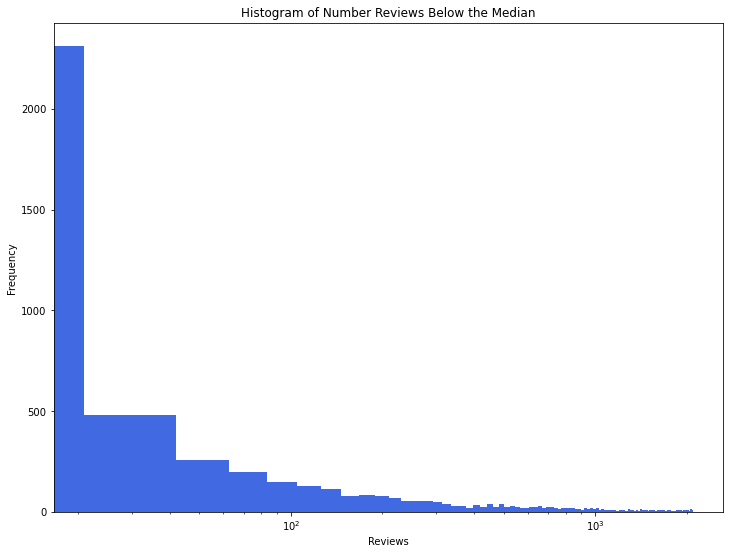

In [59]:
plt.hist(nrbelowmed['Reviews'], color='#4169E1', bins=100)
plt.title('Histogram of Number Reviews Below the Median')
plt.xlabel('Reviews')
plt.ylabel('Frequency')
plt.xscale("log")
plt.show()

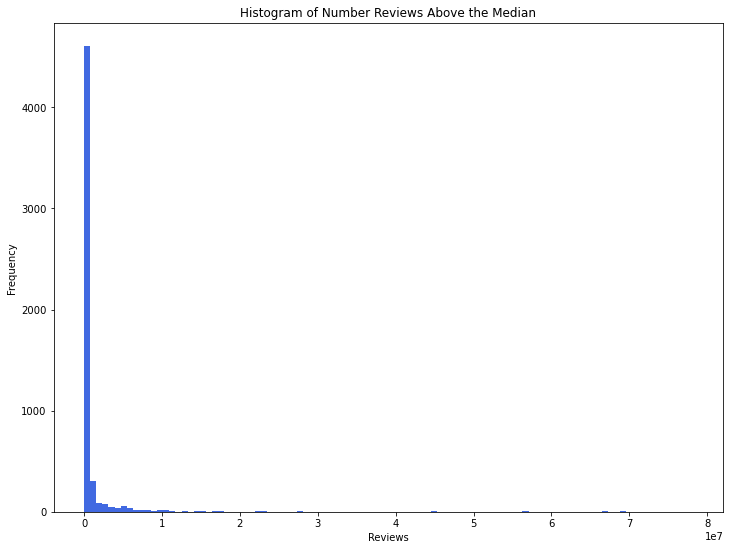

In [60]:
plt.hist(nrabovemed['Reviews'], color='#4169E1', bins=100)
plt.title('Histogram of Number Reviews Above the Median')
plt.xlabel('Reviews')
plt.ylabel('Frequency')
plt.show()

For better understanding of Reviews, used "clip."

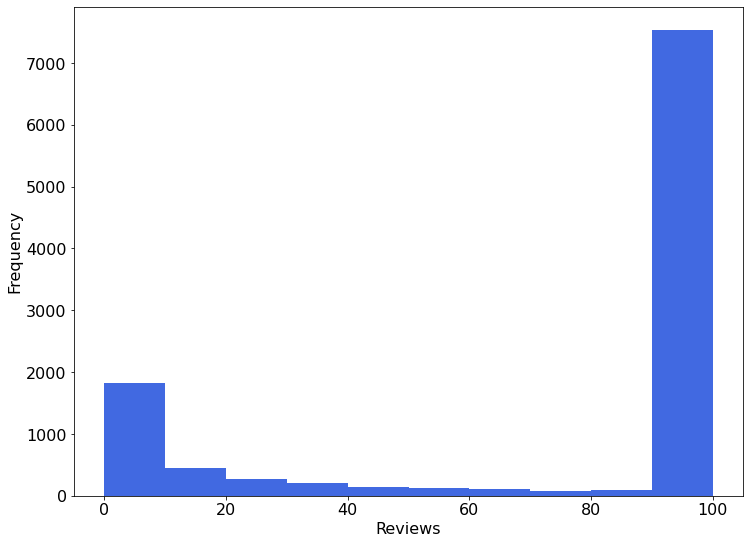

In [61]:
review_clipped = data['Reviews'].clip(0,100)
plt.hist(review_clipped, color='#4169E1', bins=10)
#plt.title('Histogram of Number Reviews Clipped (0,1000)')
plt.xlabel('Reviews',size=16)
plt.ylabel('Frequency',size=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('reviews_clipped_hist.png',bbox_inches = 'tight')
plt.show()

#### Number of Reviews and Rating 

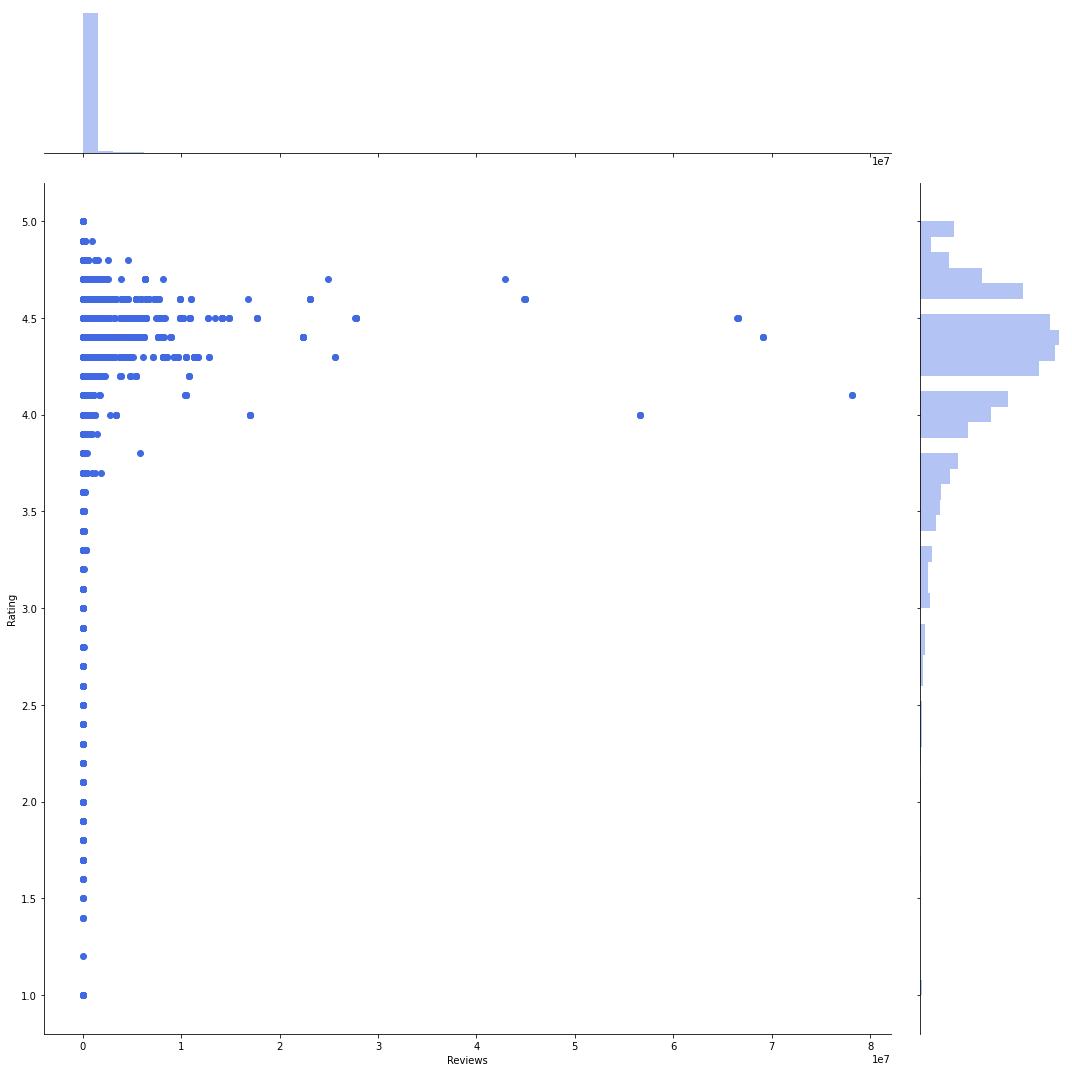

In [62]:
grr = sns.jointplot(x="Reviews", y="Rating", data=data, height=15, color = "#4169E1")
plt.savefig('reviews_rating_scatter.png',bbox_inches = 'tight')

<Figure size 1440x1440 with 0 Axes>

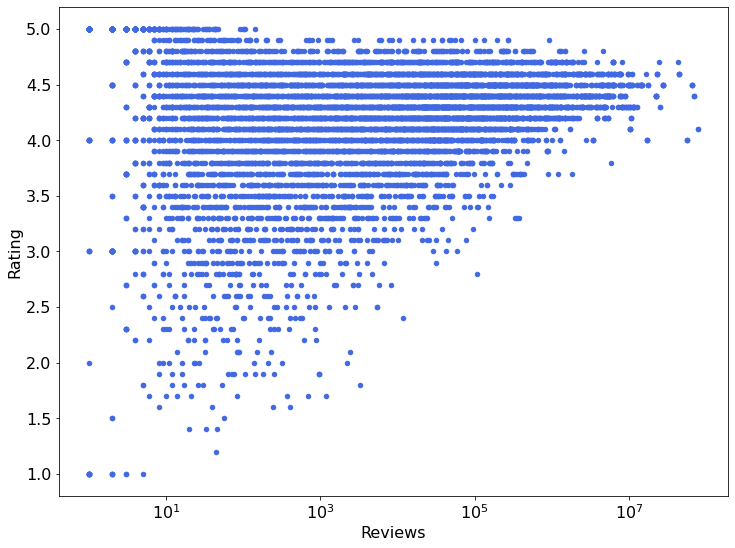

In [63]:
plt.figure(figsize = (20,20));
data.plot(x='Reviews', y='Rating', kind='scatter',color = "#4169E1")
#plt.title('Scatter Plot of Reviews and Rating',size=20)
plt.xlabel('Reviews',size=16)
plt.ylabel('Rating',size=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xscale("log")
plt.savefig('reviews_rating_scatter.png',bbox_inches = 'tight')
plt.show()

There are only few apps with a lot of reviews, and these apps tend to be on the higher ends of the rating. That is why the regresion plot tend to suggest positive relatinship between the number of reviews and rating. However this can be misleading as there are way more apps with small number of reviews and the distribution of rating for those apps are quite widespread.

### 4-7. Size <a class="anchor" id="4-7"></a>

In [64]:
data['Size'].describe()

count                  10840
unique                   461
top       Varies with device
freq                    1695
Name: Size, dtype: object

In [65]:
# Unique "Size"
data['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

Can see that there are values with different measurement (i.e. ks and Ms) and some values "Varies with device."

In [66]:
data['Size'].value_counts()

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
186k                     1
353k                     1
784k                     1
280k                     1
609k                     1
Name: Size, Length: 461, dtype: int64

In [67]:
data[data['Size']== 'Varies with device']

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,
Floor Plan Creator,ART_AND_DESIGN,4.1,36639,Varies with device,"5,000,000+",Free,0,Everyone,Art & Design,14-Jul-18,Varies with device,2.3.3 and up
Textgram - write on photos,ART_AND_DESIGN,4.4,295221,Varies with device,"10,000,000+",Free,0,Everyone,Art & Design,30-Jul-18,Varies with device,Varies with device
Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,Varies with device,"1,000,000+",Free,0,Everyone,Auto & Vehicles,30-Jul-18,Varies with device,Varies with device
Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,Varies with device,"5,000,000+",Free,0,Everyone,Auto & Vehicles,30-Jul-18,Varies with device,Varies with device
REPUVE,AUTO_AND_VEHICLES,3.9,356,Varies with device,"100,000+",Free,0,Everyone,Auto & Vehicles,25-May-18,Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...
My Earthquake Alerts - US & Worldwide Earthquakes,WEATHER,4.4,3471,Varies with device,"100,000+",Free,0,Everyone,Weather,24-Jul-18,Varies with device,Varies with device
Posta App,MAPS_AND_NAVIGATION,3.6,8,Varies with device,"1,000+",Free,0,Everyone,Maps & Navigation,27-Sep-17,Varies with device,4.4 and up
Chat For Strangers - Video Chat,SOCIAL,3.4,622,Varies with device,"100,000+",Free,0,Mature 17+,Social,23-May-18,Varies with device,Varies with device


In [68]:
# Removing "M"s and replace "k" by dividing it by 1000 -  cpmvert it to Ms
data['Size'] = data['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: float(x))

In [69]:
data['Size'].value_counts()

11.000    198
12.000    196
14.000    194
13.000    191
15.000    184
         ... 
0.027       1
0.642       1
0.647       1
0.039       1
0.942       1
Name: Size, Length: 459, dtype: int64

In [70]:
data['Size'].describe()

count    9145.000000
mean       21.516530
std        22.588748
min         0.008500
25%         4.900000
50%        13.000000
75%        30.000000
max       100.000000
Name: Size, dtype: float64

#### Histogram of Size

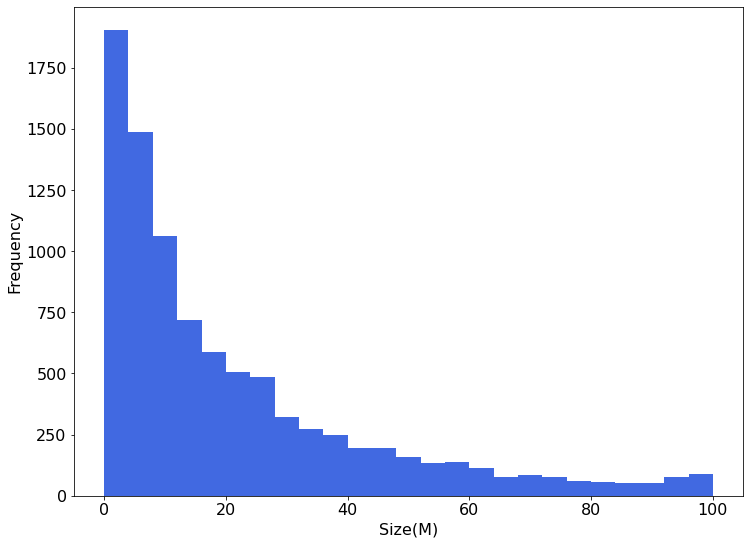

In [71]:
plt.hist(data['Size'],bins=25, color="#4169E1")
#plt.title('Histogram of Size',size=20)
plt.xlabel('Size(M)',size=16)
plt.ylabel('Frequency',size=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('size_hist.png',bbox_inches = 'tight')
plt.show()

#### Size and Rating

(array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5]),
 <a list of 0 Text major ticklabel objects>)

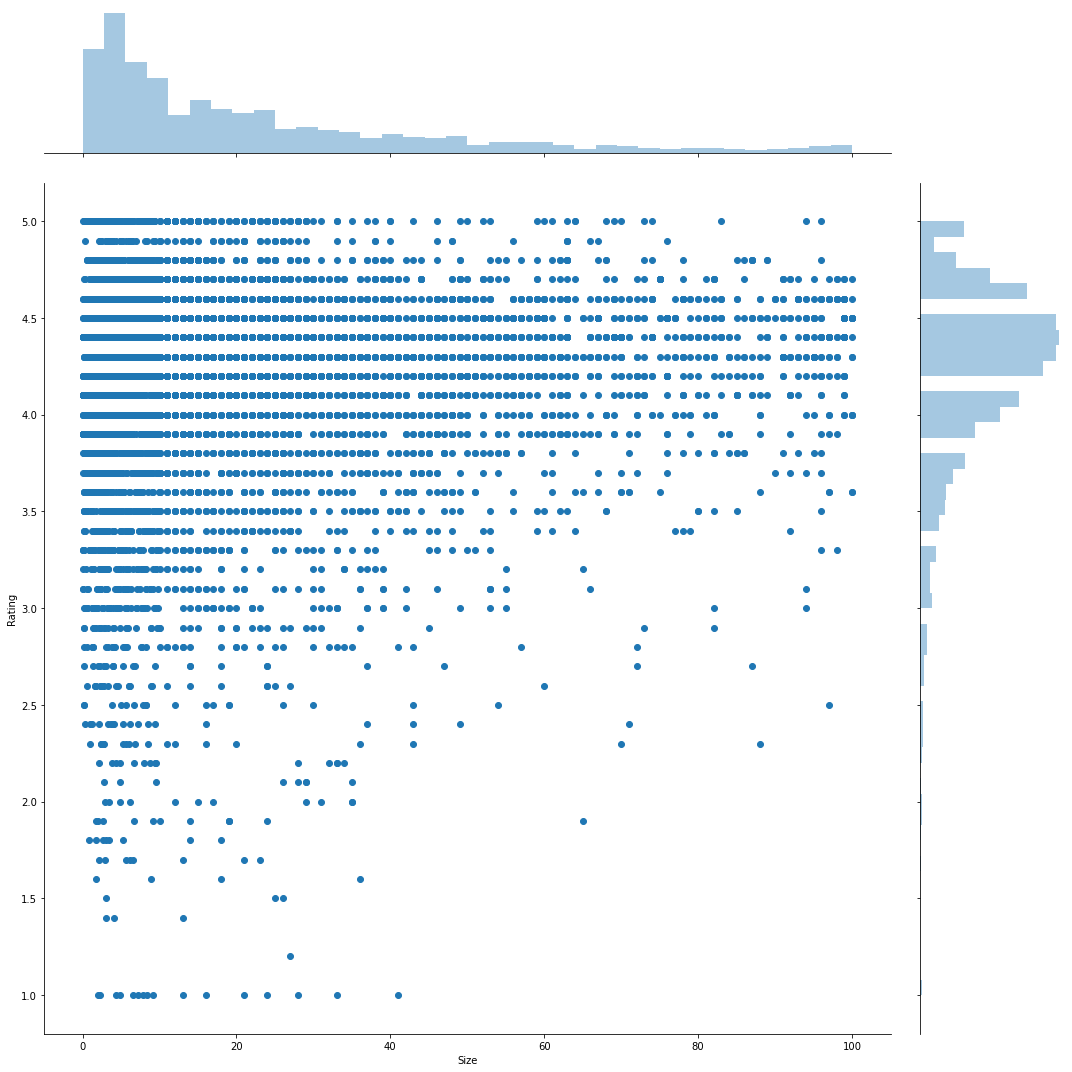

In [72]:
gsr = sns.jointplot(x="Size", y="Rating", data=data,  height=15)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

<Figure size 1440x1440 with 0 Axes>

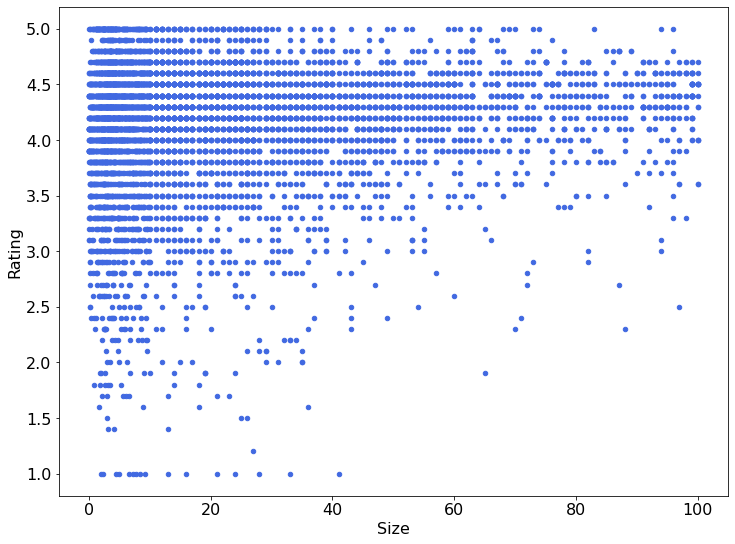

In [73]:
plt.figure(figsize = (20,20));
data.plot(x='Size', y='Rating', kind='scatter',color = "#4169E1")
#plt.title('Scatter Plot of Size and Rating',size=20)
plt.xlabel('Size',size=16)
plt.ylabel('Rating',size=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('size_rating_scatter.png',bbox_inches = 'tight')
plt.show()

### 4-8. Installs <a class="anchor" id="4-8"></a>

In [74]:
data['Installs'].describe()

count          10840
unique            21
top       1,000,000+
freq            1579
Name: Installs, dtype: object

In [75]:
# Unique "Installs"
data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [76]:
data['Installs'].value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: Installs, dtype: int64

In [77]:
# Remove "+"s
data.Installs = data.Installs.apply(lambda x: x.replace(',',''))
data.Installs = data.Installs.apply(lambda x: x.replace('+',''))
data.Installs = data.Installs.apply(lambda x: int(x))

#### Distribution of Number of Installs - Bar Plot

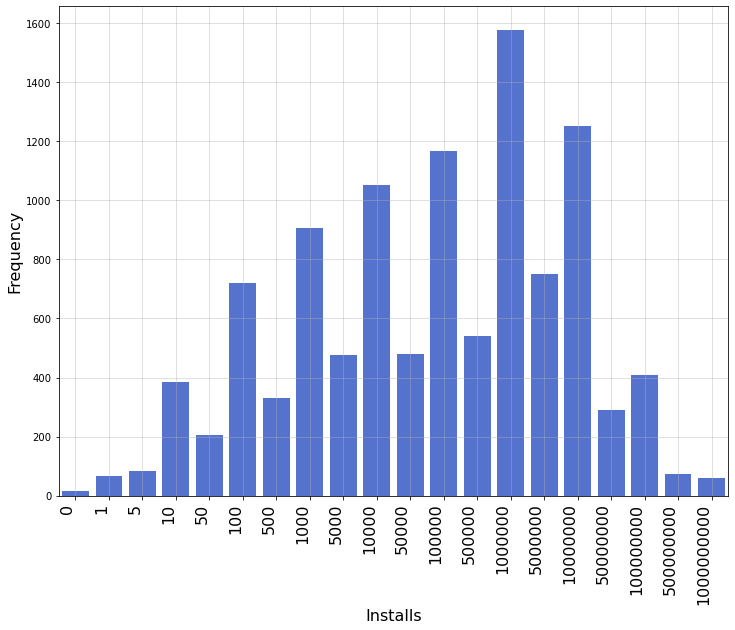

In [78]:
gi=sns.countplot(x="Installs",data=data, color = "#4169E1");
gi.set_xticklabels(gi.get_xticklabels(), rotation=90, ha="right", size=16);#
#plt.title('Bar Plot of Installs for Apps',size = 20)
plt.grid(alpha=0.5)
plt.xlabel('Installs',size=16)
plt.ylabel('Frequency',size=16)
plt.savefig('installs_bar.png',bbox_inches = 'tight')

#### Installs and Rating

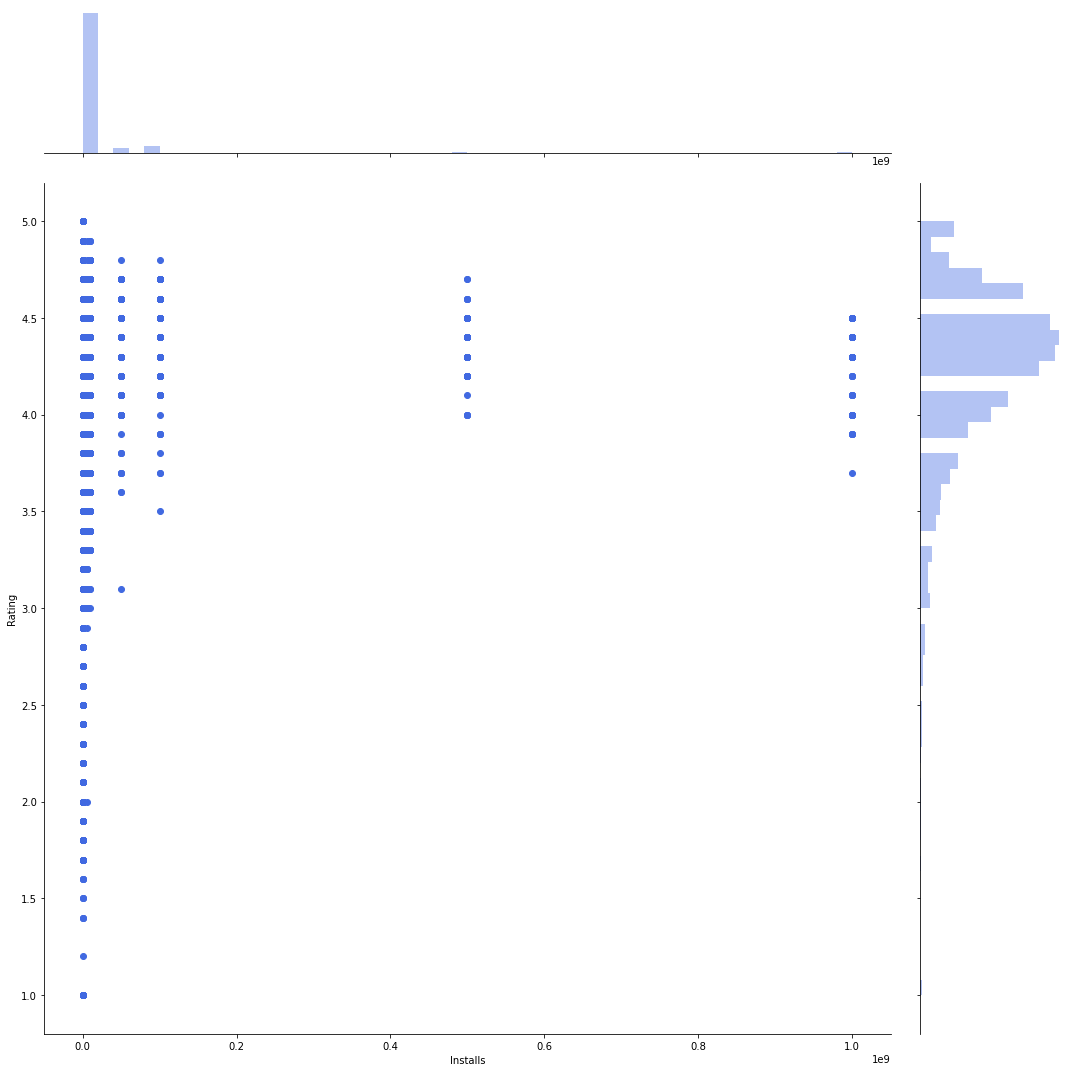

In [79]:
gir = sns.jointplot(x="Installs", y="Rating", data=data, height=15, color="#4169E1")

<Figure size 1440x1440 with 0 Axes>

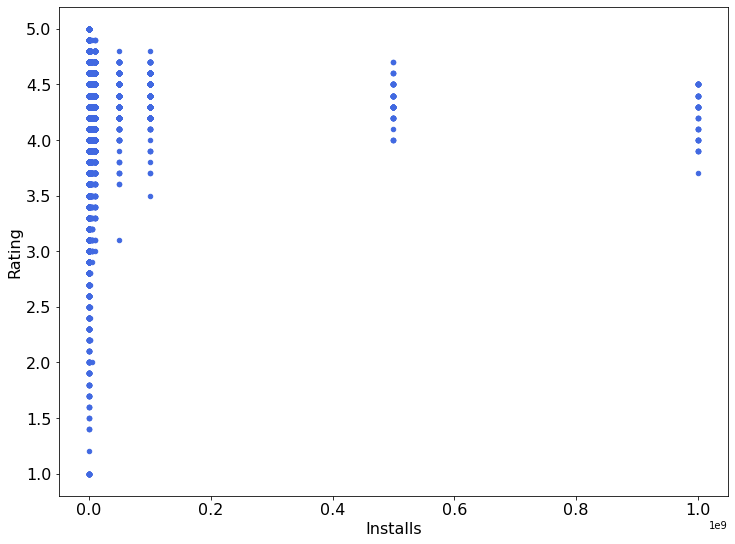

In [80]:
plt.figure(figsize = (20,20));
data.plot(x='Installs', y='Rating', kind='scatter',color = "#4169E1")
#plt.title('Scatter Plot of Size and Rating',size=20)
plt.xlabel('Installs',size=16)
plt.ylabel('Rating',size=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('install_rating_scatter.png',bbox_inches = 'tight')
plt.show()

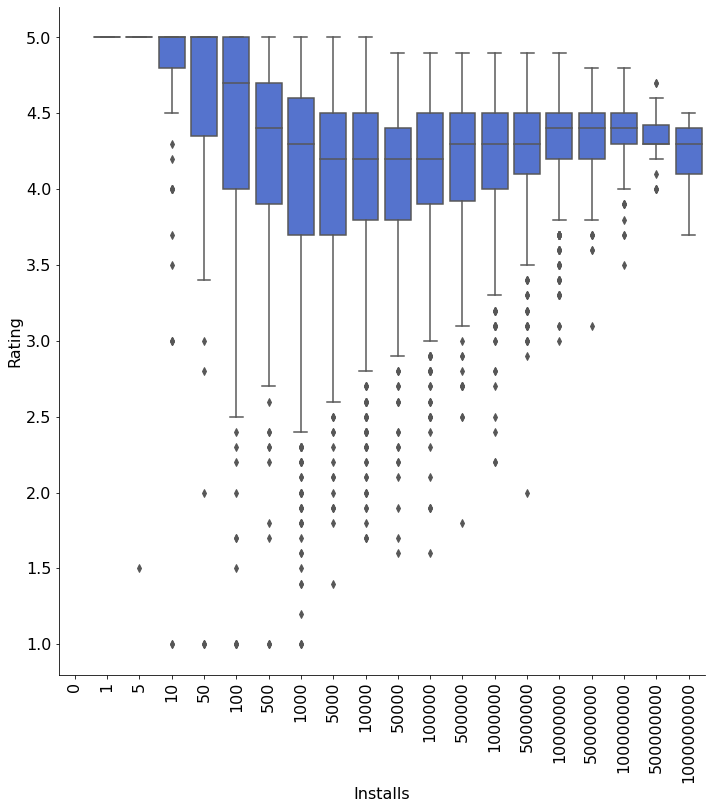

In [81]:
gri = sns.catplot(x="Installs",y="Rating",data=data, kind="box", height = 10 ,color = "#4169E1")
gri.set_xticklabels(rotation=90)
plt.xlabel('Installs',size=16)
plt.ylabel('Rating',size=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.title('Box Plot of Rating for Apps with Different Number of Installs',size = 20);
plt.savefig('installs_rating_box.png',bbox_inches = 'tight')

In [82]:
col='Installs'

v1=rabove[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)

v2=rbelow[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)

trace1 = go.Scatter(x=v1[col], y=v1["count"], name="Above Average Rating", marker=dict(color="#FF8C00"))
trace2 = go.Scatter(x=v2[col], y=v2["count"], name="Below Average Rating", marker=dict(color="#4169E1"))
y = [trace1, trace2]

layout={'title':"Number of Installs",'xaxis':{'title':"Installs"}}
fig = go.Figure(data=y, layout=layout)
iplot(fig)


There is no distinct difference in patterns between the apps with above averagerating and below average rating in number of installs.

### 4-9. Type <a class="anchor" id="4-9"></a>

In [83]:
data['Type'].describe()

count     10839
unique        2
top        Free
freq      10039
Name: Type, dtype: object

In [84]:
# Unique "Type"
data['Type'].unique()

array(['Free', 'Paid', nan], dtype=object)

In [85]:
data['Type'].value_counts()

Free    10039
Paid      800
Name: Type, dtype: int64

#### Pie Chart of Type

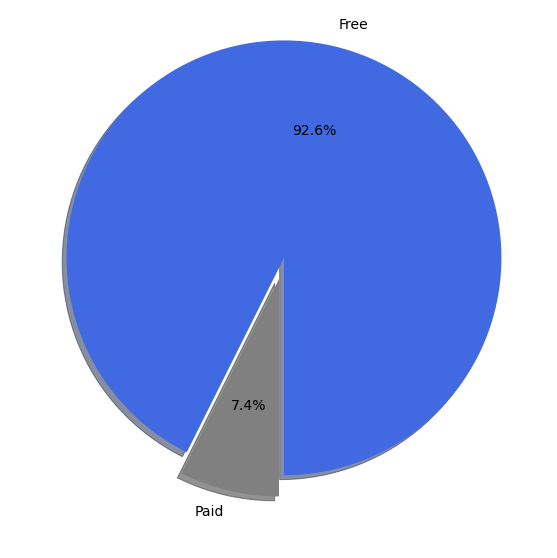

In [86]:
# Plot pie chart
labels =data['Type'].value_counts(sort = True).index
sizes = data['Type'].value_counts(sort = True)

colors = ["#4169E1","#808080"]
explode = (0.1,0)  # explode 1st slice
 
rcParams['figure.figsize'] = 10,10

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,textprops={'fontsize': 14})

#plt.title('Percent of Free Apps in Google Store',size = 20)
plt.savefig('type_pie.png',bbox_inches = 'tight')
plt.show()

In [87]:
col = "Type"
colors = ["#4169E1","#FF8C00"]
grouped = data[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.1, 0])
layout = {'title': 'Percentage of Apps that are Paid and Free'}
fig = go.Figure(data = [trace], layout = layout)
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,marker=dict(colors=colors, line=dict(color='#000000', width=0.5)))            
iplot(fig)

#### Type and Rating

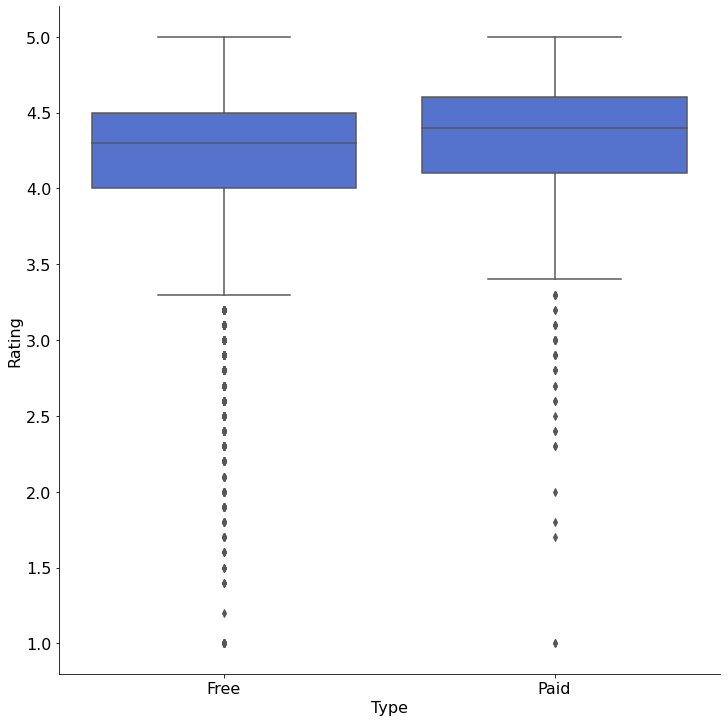

In [88]:
grt = sns.catplot(x="Type",y="Rating",data=data,height=10, kind="box",color = "#4169E1")
plt.xlabel('Type',size=16)
plt.ylabel('Rating',size=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.title('Box Plot of Rating for Apps with Different Types',size = 20);
plt.savefig('type_rating_box.png',bbox_inches = 'tight')

In [89]:
col='Type'

v1=rabove[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)

v2=rbelow[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)

trace1 = go.Scatter(x=v1[col], y=v1["count"], name="Above Average Rating", marker=dict(color="#FF8C00"))
trace2 = go.Scatter(x=v2[col], y=v2["count"], name="Below Average Rating", marker=dict(color="#4169E1"))
y = [trace1, trace2]

layout={'title':"Number of Applications for Each Type",'xaxis':{'title':"Installs"}}
fig = go.Figure(data=y, layout=layout)
iplot(fig)

### 4-10. Price <a class="anchor" id="4-10"></a>

In [90]:
data['Price'].describe()

count     10840
unique       92
top           0
freq      10040
Name: Price, dtype: object

In [91]:
# Unique "Price"
data['Price'].unique()

array(['0', '$4.99 ', '$3.99 ', '$6.99 ', '$1.49 ', '$2.99 ', '$7.99 ',
       '$5.99 ', '$3.49 ', '$1.99 ', '$9.99 ', '$7.49 ', '$0.99 ',
       '$9.00 ', '$5.49 ', '$10.00 ', '$24.99 ', '$11.99 ', '$79.99 ',
       '$16.99 ', '$14.99 ', '$1.00 ', '$29.99 ', '$12.99 ', '$2.49 ',
       '$10.99 ', '$1.50 ', '$19.99 ', '$15.99 ', '$33.99 ', '$74.99 ',
       '$39.99 ', '$3.95 ', '$4.49 ', '$1.70 ', '$8.99 ', '$2.00 ',
       '$3.88 ', '$25.99 ', '$399.99 ', '$17.99 ', '$400.00 ', '$3.02 ',
       '$1.76 ', '$4.84 ', '$4.77 ', '$1.61 ', '$2.50 ', '$1.59 ',
       '$6.49 ', '$1.29 ', '$5.00 ', '$13.99 ', '$299.99 ', '$379.99 ',
       '$37.99 ', '$18.99 ', '$389.99 ', '$19.90 ', '$8.49 ', '$1.75 ',
       '$14.00 ', '$4.85 ', '$46.99 ', '$109.99 ', '$154.99 ', '$3.08 ',
       '$2.59 ', '$4.80 ', '$1.96 ', '$19.40 ', '$3.90 ', '$4.59 ',
       '$15.46 ', '$3.04 ', '$4.29 ', '$2.60 ', '$3.28 ', '$4.60 ',
       '$28.99 ', '$2.95 ', '$2.90 ', '$1.97 ', '$200.00 ', '$89.99 ',
       '$2.56 '

In [92]:
# Remove the dollar sign and make the variable float
data.Price = data.Price.apply(lambda x: x.replace('$',''))
data['Price'] = data['Price'].apply(lambda x: float(x))

In [93]:
data['Price'].describe()

count    10840.000000
mean         1.027368
std         15.949703
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        400.000000
Name: Price, dtype: float64

Max application price is $400!

In [94]:
data['Price'].value_counts()

0.00    10040
0.99      148
2.99      129
1.99       73
4.99       72
        ...  
1.20        1
1.59        1
2.56        1
1.61        1
1.04        1
Name: Price, Length: 92, dtype: int64

In [95]:
data['Type'].value_counts()

Free    10039
Paid      800
Name: Type, dtype: int64

Most of the apps (10040) are $0. Based on the "Type." 10039 apps are actually free and only 800 apps are paid.

#### Histogram of Price

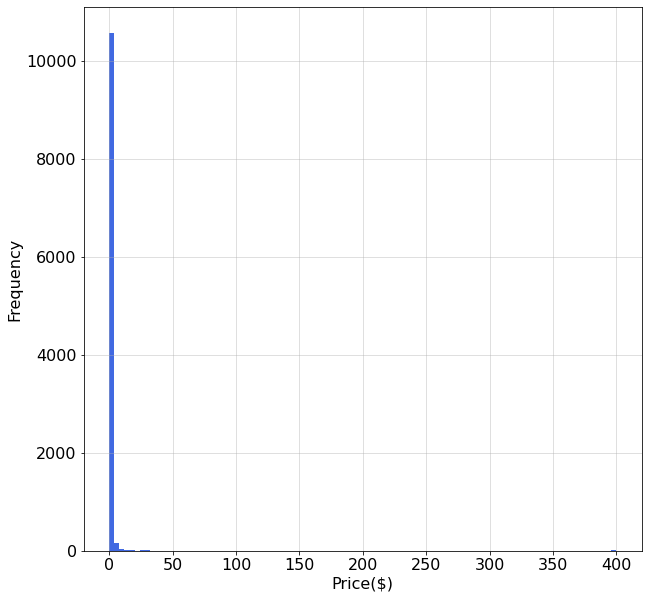

In [96]:
# Histogram
plt.hist(data['Price'],color='#4169E1', bins=100)
#plt.title('Histogram of Price', size=20)
plt.xlabel('Price($)',size=16)
plt.ylabel('Frequency',size=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(alpha=0.5)
plt.savefig('price_hist.png',bbox_inches = 'tight')
plt.show()

Due to the problem indicated above, the histogram of app price is all clustered around 0, which does not give any informative insight.

So I deided to look at the histogram of apps that are "Paid."

In [97]:
# Catagorizing the Apps by Price
pfree = data[data['Type']=='Free']
ppaid = data[data['Type']=='Paid']

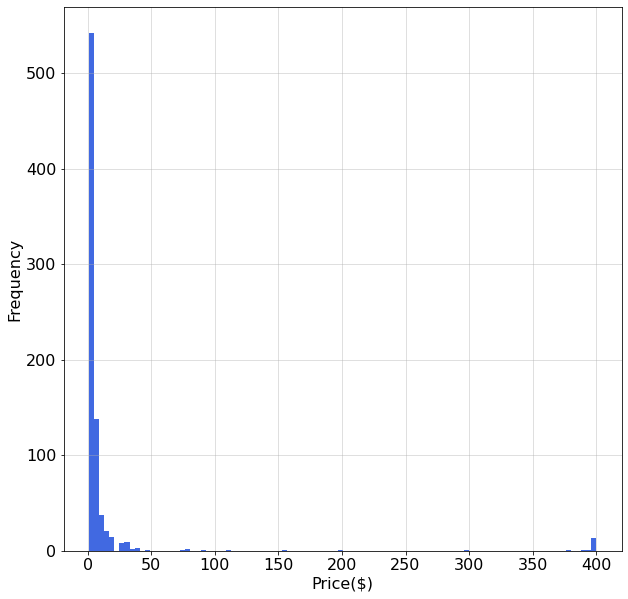

In [98]:
plt.hist(ppaid['Price'], color='#4169E1', bins=100)
#plt.title('Histogram of App Price of Only Paid Apps', size=20)
plt.xlabel('Price($)',size=16)
plt.ylabel('Frequency',size=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(alpha=0.5)
plt.savefig('pricepaid_hist.png',bbox_inches = 'tight')
plt.show()

(array([0.    , 0.0025, 0.005 , 0.0075, 0.01  , 0.0125, 0.015 , 0.0175,
        0.02  ]),
 <a list of 9 Text major ticklabel objects>)

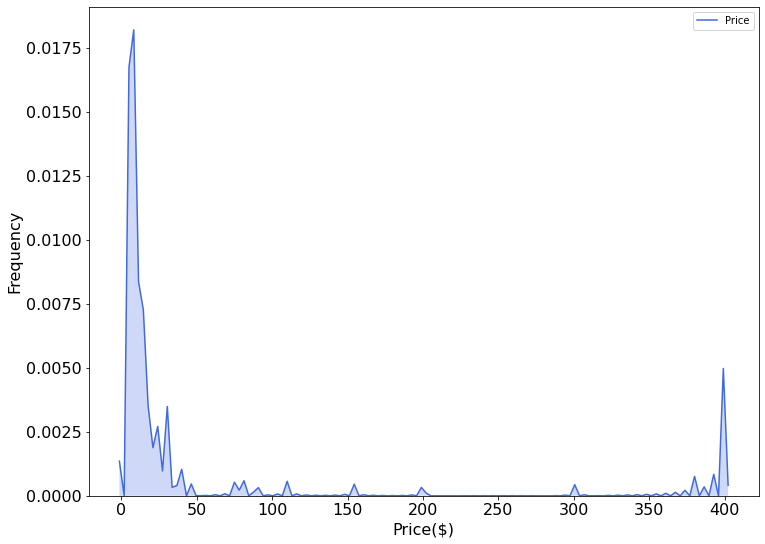

In [99]:
rcParams['figure.figsize'] = 12,9;
gr = sns.kdeplot(ppaid.Price, color="#4169E1", shade = True);
plt.xlabel('Price($)',size=16)
plt.ylabel('Frequency',size=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.title('Kernel Density Plot of Price');

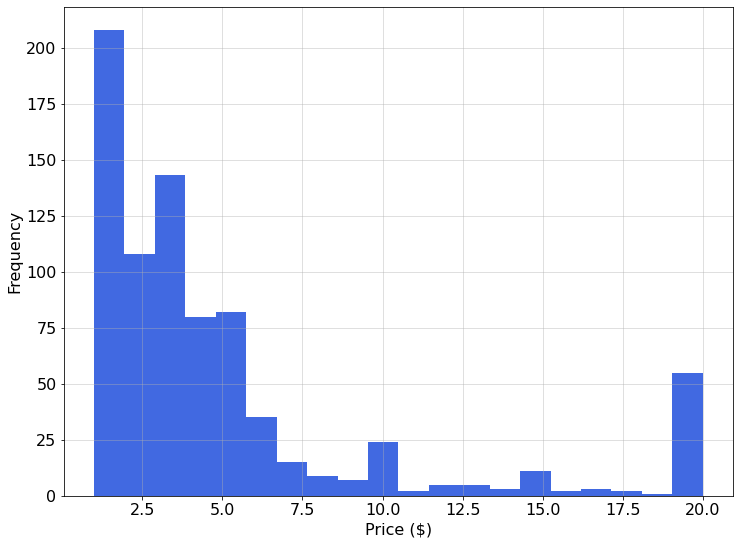

In [100]:
price_clipped = ppaid['Price'].clip(0,20)
plt.hist(price_clipped,color='#4169E1', bins=20)
#plt.title('Histogram of Number Price Clipped (0,100)',size=20)
plt.xlabel('Price ($)',size=16)
plt.ylabel('Frequency',size=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(alpha=0.5)
plt.savefig('price_clipped.png',bbox_inches = 'tight')
plt.show()

#### Price and Rating

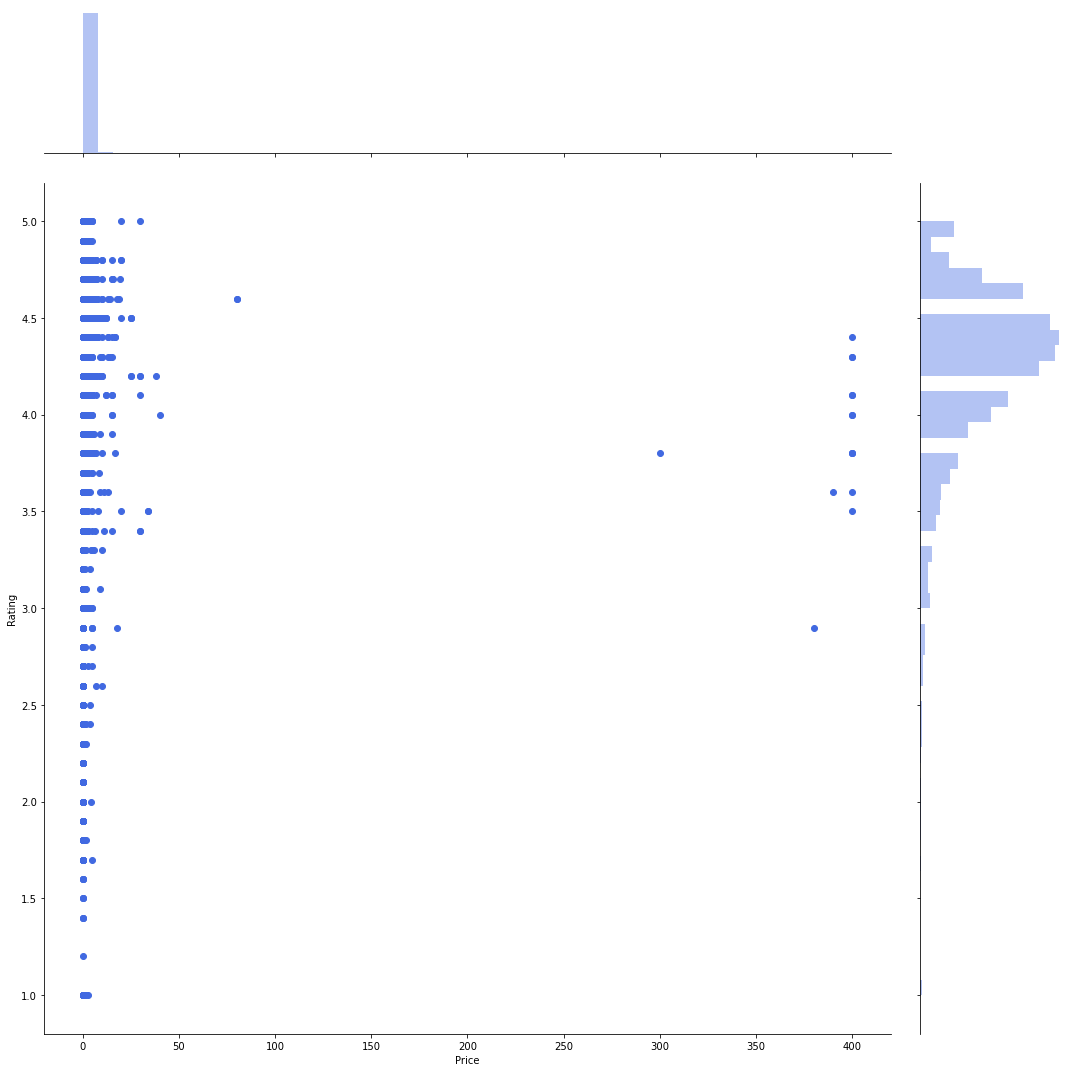

In [101]:
gpr = sns.jointplot(x="Price", y="Rating", data=data, height=15, color="#4169E1");

<Figure size 1440x1440 with 0 Axes>

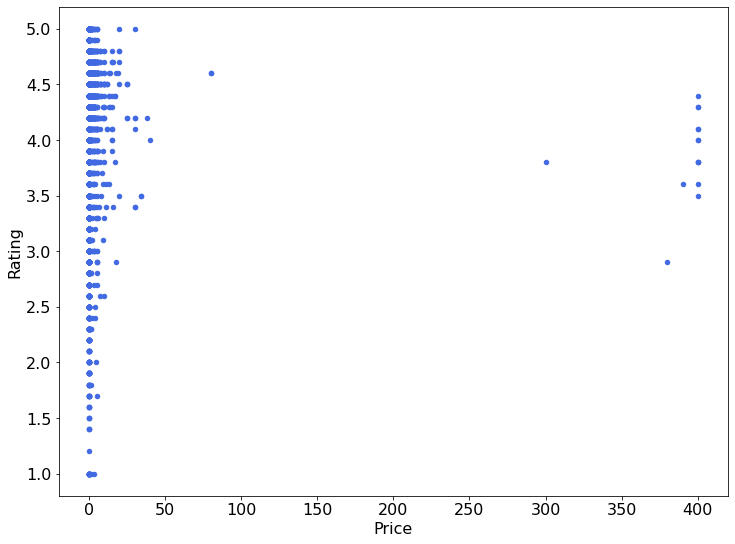

In [102]:
plt.figure(figsize = (20,20));
data.plot(x='Price', y='Rating', kind='scatter',color = "#4169E1")
#plt.title('Scatter Plot of Price and Rating',size=20)
plt.xlabel('Price',size=16)
plt.ylabel('Rating',size=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('price_rating_scatter.png',bbox_inches = 'tight')
plt.show()

### 4-11. Last Updated <a class="anchor" id="4-11"></a>

In [103]:
data['Last Updated'].describe()

count        10840
unique        1377
top       3-Aug-18
freq           326
Name: Last Updated, dtype: object

In [104]:
# Unique "Installs"
data['Last Updated'].unique()

array(['7-Jan-18', '15-Jan-18', '1-Aug-18', ..., '20-Jan-14', '16-Feb-14',
       '23-Mar-14'], dtype=object)

In [105]:
data['Last Updated'].value_counts()

3-Aug-18     326
2-Aug-18     304
31-Jul-18    294
1-Aug-18     285
30-Jul-18    211
            ... 
13-Jan-15      1
21-Aug-15      1
1-May-15       1
3-Mar-14       1
6-Jul-14       1
Name: Last Updated, Length: 1377, dtype: int64

In [106]:
#Convert to datetime object
data['Last Updated'] = pd.to_datetime(data['Last Updated'])
data['Last Updated'].describe()

count                   10840
unique                   1377
top       2018-08-03 00:00:00
freq                      326
first     2010-05-21 00:00:00
last      2018-08-08 00:00:00
Name: Last Updated, dtype: object

In [107]:
data['Last Updated'].max() 

Timestamp('2018-08-08 00:00:00')

In [108]:
data['Last Updated'].min()

Timestamp('2010-05-21 00:00:00')

In order to include "Last Updated" into the machine learning model, I have decided to only select the month that the applications have been last updated.

In [109]:
data['Month'] = data['Last Updated'].dt.month

#### Histogram of Last Updated Month

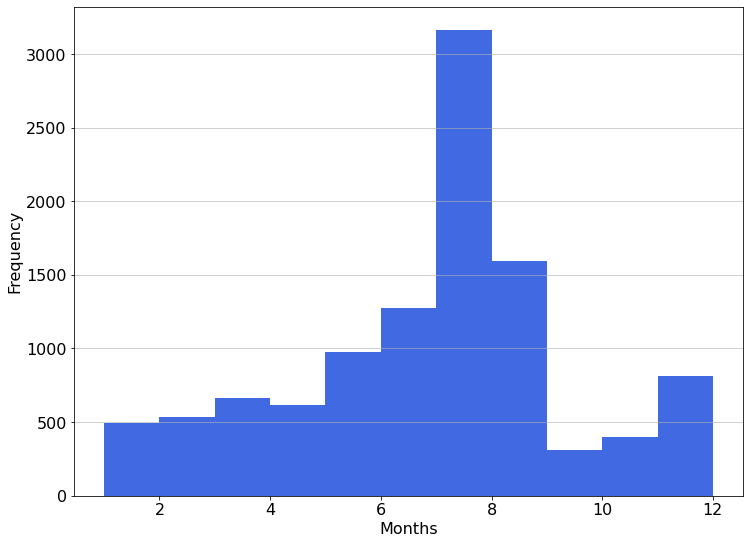

In [110]:
bins_list = [1,2,3,4,5,6,7,8,9,10,11,12]
plt.hist(data['Month'],bins=bins_list,color='#4169E1')
plt.grid(axis='y', alpha=0.75);
plt.xlabel('Months',size=16)
plt.ylabel('Frequency',size=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.title('Histogram of Last Updated Months', size=20);
plt.savefig('months_hist.png',bbox_inches = 'tight')

In [111]:
col='Month'
v1=data[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)
trace1 = go.Bar(x=v1[col], y=v1["count"], marker=dict(color="#4169E1"))
layout={'title':"Number of added over the month",'xaxis':{'title':"months"}}
fig = go.Figure(data=[trace1], layout=layout)
iplot(fig)

Interestingly, there were the most number of apps added in the month of July (7), and the least amount of applications are added in September (9).

Last Updated Month and Rating

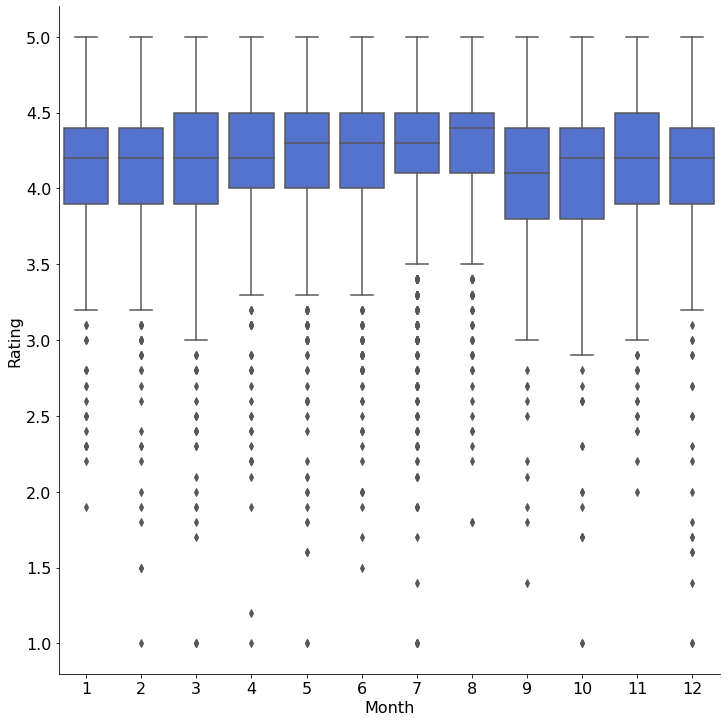

In [112]:
gg = sns.catplot(x="Month",y="Rating",data=data,  kind="box", height = 10, color="#4169E1")
gg.set_xticklabels()
gg = gg.set_ylabels("Rating")
plt.xlabel('Month',size=16)
plt.ylabel('Rating',size=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.title('Box plot of Rating for Each Last Updated Months',size = 20)
plt.savefig('month_rating_box.png',bbox_inches = 'tight')

### 4-12. Current Ver <a class="anchor" id="4-12"></a>

In [113]:
data['Current Ver'].describe()

count                  10832
unique                  2783
top       Varies with device
freq                    1459
Name: Current Ver, dtype: object

In [114]:
# Unique "Current Ver"
data['Current Ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.0.612928', '0.3.4', '2.0.148.0'],
      dtype=object)

A version number follows the semantic versioning format: MAJOR.MINOR.PATCH. The MAJOR version increases with any change that is API incompatible, MINOR increases with any change that adds functionality backwards without affecting the compatibility, and Patch increases when backwards compatible bug fixes are made. There are 10832 counts, with 2783 unique values Since this information varies greatly for each application, and therefore is not comparable, this feature will not be included in this study’s model. 

### 4-13. Android Ver <a class="anchor" id="4-13"></a>

In [115]:
data['Android Ver'].describe()

count          10838
unique            33
top       4.1 and up
freq            2451
Name: Android Ver, dtype: object

In [116]:
# Unique "Android Ver"
data['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

#### Android Ver Bar Plot

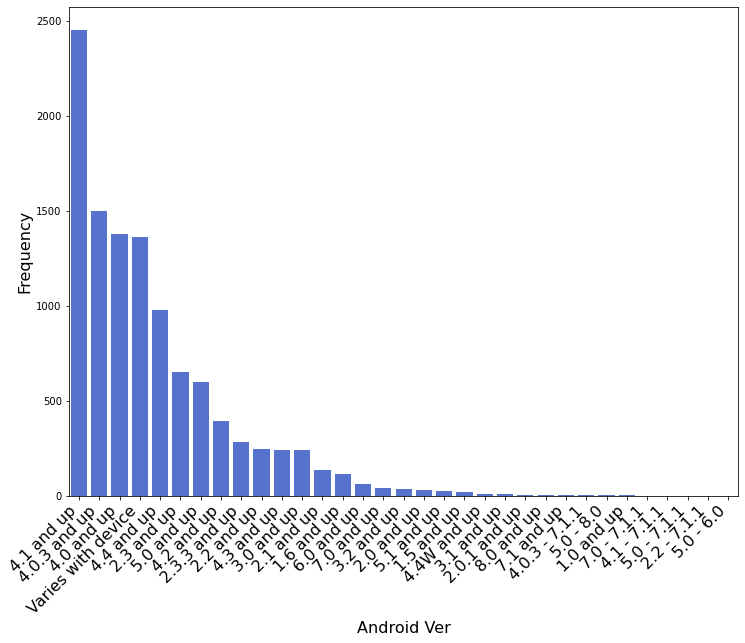

In [117]:
gi=sns.countplot(x="Android Ver",data=data, color = "#4169E1",order = data['Android Ver'].value_counts().index)
gi.set_xticklabels(gi.get_xticklabels(), rotation=45, ha="right", size=16);#
plt.xlabel('Android Ver',size=16)
plt.ylabel('Frequency',size=16)
plt.savefig('andver_bar.png',bbox_inches = 'tight')

In [118]:
data['av']=data['Android Ver'].astype(str).str[0]

Just as the Current Ver, Android Ver is in the semantic versioning format. However, this information can be useful as it is the version of android that each application can support, and therefore is more comparable. There are 33 unique values out of 10838 counts, and the values are rather difficult to comprehend. Therefore, in this study, categorical variables for the Android Ver is created by grouping them by the first MAJOR version.

In [119]:
data['av'].unique()

array(['4', '2', '3', 'V', '5', '6', '1', '7', '8', 'n'], dtype=object)

There are V (varies with device) and n (nan). I have decided to merge them into one cateogry called NA.

In [120]:
data = data.replace({"V":"0", "n":"0"})

In [121]:
data['av'].unique()

array(['4', '2', '3', '0', '5', '6', '1', '7', '8'], dtype=object)

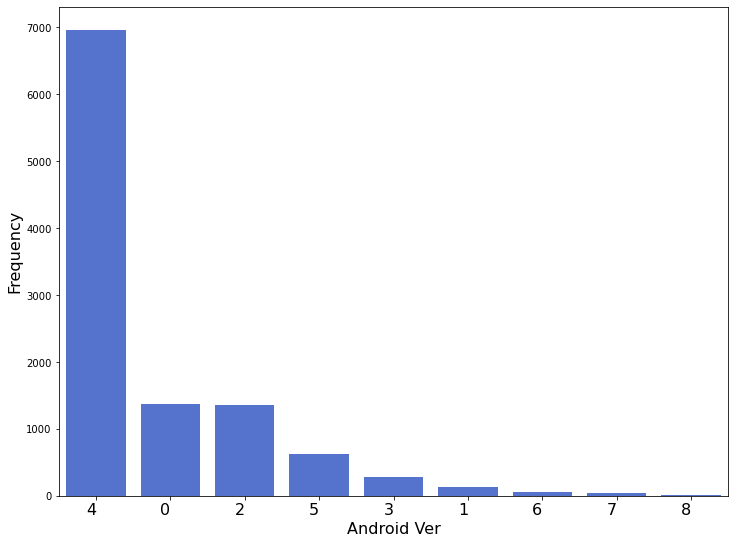

In [122]:
gi=sns.countplot(x="av",data=data, color = "#4169E1", order = data['av'].value_counts().index);
gi.set_xticklabels(gi.get_xticklabels(), ha="right", size=16);
plt.xlabel('Android Ver',size=16)
plt.ylabel('Frequency',size=16)
plt.savefig('andver_barcleaned.png',bbox_inches = 'tight')

#### Android Version and Rating

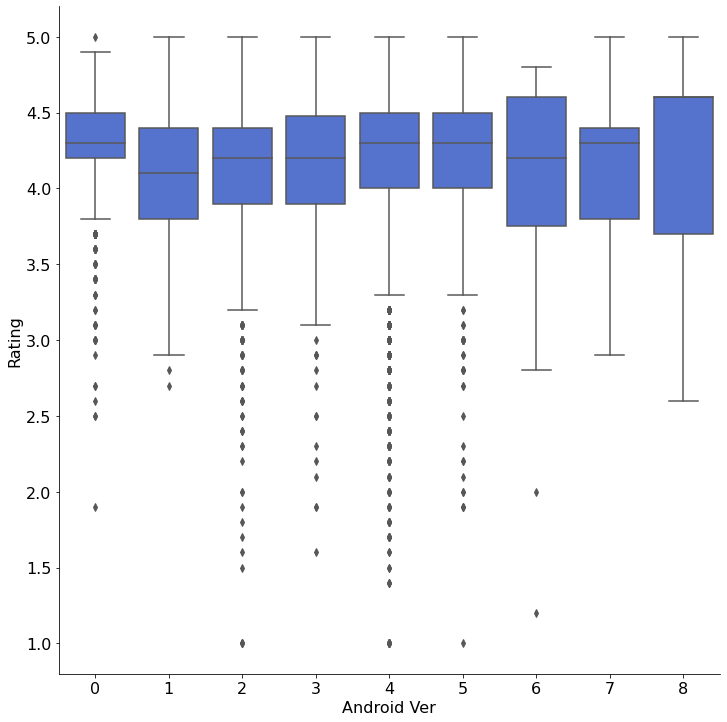

In [123]:
gg = sns.catplot(x="av",y="Rating",data=data,  kind="box", height = 10, color="#4169E1")
gg.set_xticklabels()
gg = gg.set_ylabels("Rating")
plt.xlabel('Android Ver',size=16)
plt.ylabel('Rating',size=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.title('Box plot of Rating for Each Last Updated Months',size = 20)
plt.savefig('androidver_rating_box.png',bbox_inches = 'tight')

There are the most number of applications that support Android versions of 4 and up. 

## 5. Correlation <a class="anchor" id="Correlation"></a>

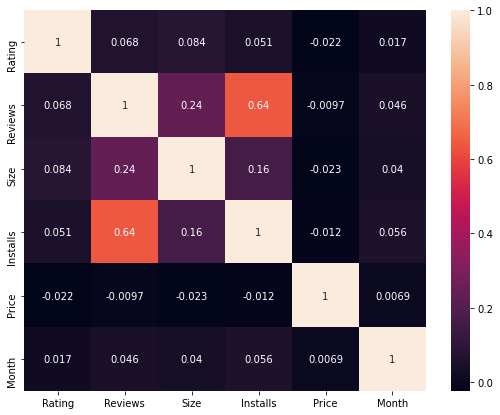

In [124]:
plt.figure(figsize=(9,7))
sns.heatmap(data.corr(),annot=True)
plt.savefig('correlation.png',bbox_inches = 'tight')

There is a moderate positive correlation of 0.64 between the number of installs and reviews. The apps that the customers downloaded more tend to have more reviews.

## 6. Export the Data <a class="anchor" id="ExportData"></a>

In [125]:
data.to_csv('googleplaystore_1eda.csv', index = True)